<a href="https://colab.research.google.com/github/holstbone/NLP/blob/main/A_1_First_Vectorized_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.1 First Vectorized Representation


Our goal in this exercise is to BEGIN coming to a common agreement, among this class, as to what terms we will use as we selectively refine our corpus-wide vocabulary. This corpus vocabulary is what would represent the content of each different document for clustering and classification purposes, which will be our next step. This means that we need to make decisions - what is in, what is out.

Our decisions - right now - are not carved in stone. This is an EXERCISE in HOW TO THINK. We're not going to get final product this week.

Right now, we just want to get a sense of how this works.



### Step 1: Qualitative Approach


To decide on whether or not we will keep a term, we need to know that:

1. It is important, in at least one (preferably more) documents, and
2. It is prevalent, in at least two or three of the documents.
As usual, there is a bit of a judgment call involved.

***The goal here is to identify terms within your document that you think are good candidates for the corpus vocabulary.*** Just think about your document, ***identify the three or four terms*** that you'd like to see in a final vector that we'd use for clustering and/or classification.

Summarize your nominations in your Report. 


### Step 2: Evaluate Results of Code


Experiment (to the extent that you comfortably can) with the code provided, which produces both a tf-idf AND eventually Word2Vec  and  Doc2Vec output. Report on your experiment.

To the best of your ability, see if you can find the actual (code-produced) tf-idf scores for key terms in your two documents. 

Do the terms that you think are important actually have a corpus-wide high-enough tf-idf so that they warrant inclusion in a vector that would be used for clustering and classification? 

The IMPORTANT thing is that, having developed a bit of intuition about how you think tf-idf works, see if it bears out when you see actual algorithmic results. 

* For example, find the two or three terms (nouns / noun phrases) from your documents that you thought would have the highest tf-idf, and see if they did indeed have the highest tf-idf as shown in the algorithmic outputs. 
* Similarly, find two or three terms that you thought would have a lower tf-idf, and see if that bears out. 
Report your results in a short (typically 5-pg) document (pdf preferred). 
(Page length is not critical.) Express what you've learned as succinctly as possible. 

At the end, summarize your insights about tf-idf and Word2Vec / Doc2Vec, given your assessment of code outputs. 


# Andy's Work Starts Here:

In [ ]:
!python --version

Python 3.7.10


## Load Python Libraries

In [ ]:
###############################################################################
### packages required to run code.  Make sure to install all required packages.
###############################################################################
import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import ngrams, FreqDist
import nltk

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, silhouette_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import TSNE

from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


import pandas as pd
import os
import numpy as np
#import phrasemachine
#from rake_nltk import Rake
import re
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
import gensim
import matplotlib

from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
from collections import OrderedDict
import copy
import math

In [ ]:
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The numpy version is {}.'.format(np.__version__))
print('The nltk version is {}.'.format(nltk.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The scikit learn version is {}.'.format(sklearn.__version__))
print('The gensim version is {}.'.format(gensim.__version__))
print('The re version is {}.'.format(re.__version__))

The matplotlib version is 3.2.2.
The numpy version is 1.19.5.
The nltk version is 3.2.5.
The pandas version is 1.1.5.
The scikit learn version is 0.22.2.post1.
The gensim version is 3.6.0.
The re version is 2.2.1.


In [ ]:
# Only run this once, they will be downloaded.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Load CSV (Class Corpus)

In [ ]:

###############################################################################
### Processing text into lists
###############################################################################
def get_corpus(path_to_file):
    #read in class corpus csv into python
    data=pd.read_csv(path_to_file)

    #create empty list to store text documents titles
    titles=[]
    docids=[]
    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        docids.append(data['Doc_ID'].iloc[i])

    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        titles.append(data['DSI_Title'].iloc[i])

    #create empty list to store text documents
    text_body=[]

    #for loop which appends the text to the text_body list
    for i in range(0,len(data)):
        temp_text=data['Text'].iloc[i]
        text_body.append(temp_text)
    return (docids,titles,text_body)

In [ ]:
###############################################################################
### Setup path to file, get the corpus, set up 
###############################################################################
path_to_file='/content/453_Sec56_Class_Corpus_v3_AH.csv'
docids,titles,text=get_corpus(path_to_file)

In [ ]:

text[75]

'Interstellaris a visual masterpiece that has a human touch that propels it to greatness.It is perhaps one of the best space movies ever made.\rChristopher Nolan isnt one known to be taciturn when it comes to his movies. Even his smaller movies likeMomentohave grand structures bolstering their simple plots. However,Interstellaris easily is first brush with the epic  unless you consider the fullDark Knighttrilogy as one. On paper, it should not work. A sweeping narrative covering different times and worlds would be eaten up by audiences. Thats whyGravityfound so much success financially and at the Oscars. But Nolan does something completely different withInterstellar. He introduces science in a way that isnt watered down or ignored. His film, according to astrophysicists, is completely plausible. Though that fact makes the movie a hard one to digest for viewers, the end result is an incredible study of human nature and our desire to survive.\rFood is running out. The world is becoming o

In [ ]:
titles[75]

'ELC_Doc5_Interstellar_Positive'

In [ ]:
#Obtains the words count frequencies across corpus

vectorizer = CountVectorizer(ngram_range = (1,1))
matrix=vectorizer.fit_transform(text)     

#creating dataframe from TFIDF Matrix
words = vectorizer.get_feature_names()
matrix=pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names(), index=titles)

frequencies = matrix.sum().transpose().reset_index()

frequencies.columns = ['word', 'counts']



In [ ]:
frequencies.head(10)

word  counts
0            00       4
1           000       4
2  0000779fd2ac       2
3      002aafce       1
4           007      16
5          007s       1
6          00pm       2
7            01       5
8            02       4
9            03       5

In [ ]:
def clean_doc_exp1(doc): 
  tokens = doc.split() 
  # convert to lower case ADDED
  tokens = [word.lower() for word in tokens]
  # prepare regex for char filtering 
  re_punc = re.compile('[%s]' % re.escape(string.punctuation)) 
  # remove punctuation from each word 
  tokens = [re_punc.sub('', w) for w in tokens] 
  # remove remaining tokens that are not alphabetic 
  tokens = [word for word in tokens if word.isalpha()] 
  # filter out stop words 
  stop_words = set(stopwords.words('english')) 
  tokens = [w for w in tokens if not w in stop_words] 
  # filter out short tokens 
  tokens = [word for word in tokens if len(word) > 1] 
  return tokens

In [ ]:
tokens = clean_doc_exp1(text[75])
sorted_tokens = sorted(tokens, key=len)

In [ ]:
sorted_tokens[-10:-1]

['whygravityfound',
 'astrophysicists',
 'withinterstellar',
 'noncondescending',
 'ofinterstellaris',
 'ininterstellaris',
 'callinterstellara',
 'ininterstellarbegin',
 'boyhoodandmoonlight']

In [ ]:
data = pd.read_csv(path_to_file)

# EXPERIMENT 1: Manually convert text documents from Western European (Mac) and Western European (Windows), to Unicode (UTF-8)

In [ ]:
text_orig = text.copy()

In [ ]:
data_orig = data.copy()

In [ ]:
data = data.drop(columns=['Text'])

In [ ]:
data['Text'] = text

In [ ]:
data.head()

Doc_ID  ...                                               Text
0       0  ...  Title: Arrival is a waste of space\r\n\tAuthor...
1       1  ...  Title: Denis Villeneuves Arrival Is Brainy Sci...
2       2  ...  Title: Arrival Arrives Just in Time Despite a ...
3       3  ...  Title: The prescient wisdom of Arrival: How it...
4       4  ...  Title: Arrival is a stunning science fiction m...

[5 rows x 8 columns]

In [ ]:
text_orig[75]

'Interstellaris a visual masterpiece that has a human touch that propels it to greatness.It is perhaps one of the best space movies ever made.\rChristopher Nolan isnt one known to be taciturn when it comes to his movies. Even his smaller movies likeMomentohave grand structures bolstering their simple plots. However,Interstellaris easily is first brush with the epic  unless you consider the fullDark Knighttrilogy as one. On paper, it should not work. A sweeping narrative covering different times and worlds would be eaten up by audiences. Thats whyGravityfound so much success financially and at the Oscars. But Nolan does something completely different withInterstellar. He introduces science in a way that isnt watered down or ignored. His film, according to astrophysicists, is completely plausible. Though that fact makes the movie a hard one to digest for viewers, the end result is an incredible study of human nature and our desire to survive.\rFood is running out. The world is becoming o

In [ ]:
zip_path = '/content/Documents_AH_Manual_Clean.zip'
!cp "{zip_path}" .
!unzip -q Documents_AH_Manual_Clean.zip
!rm Documents_AH_Manual_Clean.zip

In [ ]:

FOLDER = "/content/Documents_AH_Manual_Clean"

In [ ]:
def get_corpus_text( path, titles ) :
    text_body=[]
    for doc in titles :
        filename = os.path.join( path, doc+'.txt' )
        # load text 
        files = os.listdir( path )
        #print(filename)
        file = open(filename, 'rt')#, encoding='utf-8-sig') 
        temp_text = file.read()
        file.close()
        text_body.append(temp_text)
        #print(len(text_body))
        
    return text_body, files

In [ ]:
text, file = get_corpus_text( FOLDER, titles  )

In [ ]:
len(text)

200

In [ ]:
text[75]

'\ufeffInterstellar\xa0is a visual masterpiece that has a human touch that propels it to greatness.\xa0It is perhaps one of the best space movies ever made.\nChristopher Nolan isn’t one known to be taciturn when it comes to his movies. Even his smaller movies like\xa0Momento\xa0have grand structures bolstering their simple plots. However,\xa0Interstellar\xa0is easily is first brush with the epic — unless you consider the full\xa0Dark Knight\xa0trilogy as one. On paper, it should not work. A sweeping narrative covering different times and worlds would be eaten up by audiences. That’s why\xa0Gravity\xa0found so much success financially and at the Oscars. But Nolan does something completely different with\xa0Interstellar. He introduces science in a way that isn’t watered down or ignored. His film, according to astrophysicists, is completely plausible. Though that fact makes the movie a hard one to digest for viewers, the end result is an incredible study of human nature and our desire to 

In [ ]:
tokens = clean_doc_exp1(text[75])
sorted_tokens = sorted(tokens, key=len)

In [ ]:
sorted_tokens[-10:-1]

['interstellar',
 'performances',
 'overpopulated',
 'gravitational',
 'heartbreaking',
 'heartbreaking',
 'introspective',
 'sentimentality',
 'astrophysicists']

In [ ]:
vectorizer = CountVectorizer(ngram_range = (1,1))
matrix=vectorizer.fit_transform(text)
words = vectorizer.get_feature_names()
matrix=pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names(), index=titles)
frequencies = matrix.sum().transpose().reset_index()
frequencies.columns = ['word', 'counts']
frequencies.head(10)

word  counts
0      00       2
1     000       4
2     007      17
3  083333       1
4      0s       1
5      10      20
6     100       6
7     101      17
8     103       1
9      11      25

In [ ]:
def clean_doc_exp1(doc): 
  tokens = doc.split() 
  # convert to lower case ADDED
  tokens = [word.lower() for word in tokens]
  # prepare regex for char filtering 
  re_punc = re.compile('[%s]' % re.escape(string.punctuation)) 
  # remove punctuation from each word 
  tokens = [re_punc.sub('', w) for w in tokens] 
  # remove remaining tokens that are not alphabetic 
  tokens = [word for word in tokens if word.isalpha()] 
  # filter out stop words 
  stop_words = set(stopwords.words('english')) 
  tokens = [w for w in tokens if not w in stop_words] 
  # filter out short tokens 
  tokens = [word for word in tokens if len(word) > 1] 
  return tokens

In [ ]:
def clean_doc_test(doc): 
  tokens = doc.split() 
  lem = WordNetLemmatizer()
  temp_tokens = tokens.copy()
  tokens = ' '.join([lem.lemmatize(w) for w in temp_tokens])
  tokens = tokens.split()
  # convert to lower case ADDED
  #tokens = [word.lower() for word in tokens]
  # prepare regex for char filtering 
  #re_punc = re.compile('[%s]' % re.escape(string.punctuation)) 
  # remove punctuation from each word 
  #tokens = [re_punc.sub('', w) for w in tokens] 
  # remove remaining tokens that are not alphabetic 
  #tokens = [word for word in tokens if word.isalpha()] 
  # filter out stop words 
  #stop_words = set(stopwords.words('english')) 
  #tokens = [w for w in tokens if not w in stop_words] 
  # filter out short tokens 
  #tokens = [word for word in tokens if len(word) > 1] 
  return tokens

In [ ]:
len(text[0])

3544

In [ ]:
temp_tokens = clean_doc_test(text[0])

In [ ]:
len(temp_tokens)

602

In [ ]:
tokens = []

for doc in text:
  temp_tokens = clean_doc_exp1(doc)
  tokens.append(temp_tokens)

In [ ]:
bow_all = []

for i in range(len(tokens)):
  bag_of_words = Counter(tokens[i])
  bow = bag_of_words.most_common(4)
  bow_all.append(bow)

In [ ]:
bow_all

[[('one', 4), ('film', 4), ('every', 4), ('aliens', 4)],
 [('louise', 9), ('arrival', 8), ('aliens', 6), ('like', 6)],
 [('adams', 9), ('arrival', 6), ('world', 5), ('language', 5)],
 [('louise', 5), ('future', 5), ('us', 5), ('despite', 5)],
 [('arrival', 14), ('different', 12), ('one', 11), ('world', 11)],
 [('louise', 7), ('heptapods', 7), ('know', 7), ('world', 5)],
 [('arrival', 6), ('like', 6), ('film', 5), ('one', 5)],
 [('villeneuves', 6), ('arrival', 5), ('one', 4), ('world', 3)],
 [('something', 5), ('aliens', 4), ('louise', 4), ('whose', 3)],
 [('arrival', 6), ('film', 5), ('like', 4), ('louise', 4)],
 [('bond', 11), ('casino', 6), ('hes', 5), ('royale', 5)],
 [('bond', 28), ('bonds', 11), ('first', 10), ('casino', 8)],
 [('bond', 16), ('film', 7), ('le', 6), ('chiffre', 6)],
 [('bond', 11), ('new', 3), ('hes', 3), ('million', 3)],
 [('bond', 18), ('royale', 5), ('film', 5), ('game', 5)],
 [('bond', 15), ('hes', 6), ('craig', 5), ('bonds', 5)],
 [('bond', 24), ('casino', 9),

# EXPERIMENT 2A (TDM Matrix - Frequency)

Brownlee_Chapter_8&9_The_Bag-of-Words_Model

In [ ]:
# load all docs in a directory 

def process_docs_exp2(text, vocab): 
  for doc in text:
    add_doc_to_vocab_exp2(doc, vocab)

In [ ]:
def add_doc_to_vocab_exp2(doc, vocab): 
  # clean doc 
  tokens = clean_doc_exp1(doc) 
  # update counts 
  vocab.update(tokens)


In [ ]:
# define vocab 
vocab = Counter() 
# add all docs to vocab 
process_docs_exp2(text_orig, vocab) 
# print the size of the vocab 
print(len(vocab))

17125


In [ ]:
vocab.most_common(20)

[('film', 616),
 ('one', 542),
 ('movie', 477),
 ('like', 428),
 ('time', 376),
 ('even', 255),
 ('also', 242),
 ('much', 233),
 ('story', 227),
 ('us', 227),
 ('first', 224),
 ('bond', 224),
 ('way', 217),
 ('movies', 217),
 ('films', 201),
 ('get', 191),
 ('two', 188),
 ('action', 175),
 ('made', 170),
 ('john', 169)]

In [ ]:
def clean_doc_exp2a(doc): 
  tokens = doc.split()
  # convert to lower case ADDED
  tokens = [word.lower() for word in tokens]
  # prepare regex for char filtering 
  re_punc = re.compile('[%s]' % re.escape(string.punctuation)) 
  # remove punctuation from each word 
  tokens = [re_punc.sub('', w) for w in tokens] 
  # remove remaining tokens that are not alphabetic 
  tokens = [word for word in tokens if word.isalpha()] 
  # filter out stop words 
  stop_words = set(stopwords.words('english')) 
  tokens = [w for w in tokens if not w in stop_words] 
  # filter out short tokens 
  tokens = [word for word in tokens if len(word) > 1]
  lem = WordNetLemmatizer()
  temp_tokens = tokens.copy()
  tokens = ' '.join([lem.lemmatize(w) for w in temp_tokens])
  tokens = tokens.split()
  # most_freq = set(['movie', 'movies', 'films',
  #                  'one', 'like', 'even', 'also', 'much', 'first',
  #              'us', 'way', 'get', 'two', 'made', 'never',
  #              'little', 'though', 'something', 'would',
  #              'best', 'make', 'could', 'good', 'well',
  #              'see', 'another', 'really', 'still', 'makes',
  #              'know', 'many', 'around', 'man', 'house',
  #              'every', 'last', 'might', 'things', 'people',
  #              'characters', 'almost', 'enough', 'yet',
  #              'doesnt', 'thats', 'dont'])
  # tokens = [w for w in tokens if not w in most_freq] 
  return tokens

In [ ]:
def add_doc_to_vocab_exp2(doc, vocab): 
  # clean doc 
  tokens = clean_doc_exp2a(doc) 
  # update counts 
  vocab.update(tokens)


In [ ]:
# define vocab 
vocab = Counter() 
# add all docs to vocab 
process_docs_exp2(text_orig, vocab) 
# print the size of the vocab 
vocab.most_common(20)

[('film', 817),
 ('movie', 694),
 ('one', 566),
 ('like', 442),
 ('time', 435),
 ('get', 297),
 ('character', 268),
 ('bond', 263),
 ('make', 262),
 ('story', 255),
 ('even', 255),
 ('way', 246),
 ('also', 242),
 ('much', 233),
 ('u', 227),
 ('first', 224),
 ('word', 197),
 ('two', 188),
 ('scene', 183),
 ('action', 182)]

In [ ]:
def clean_doc_exp2(doc): 
  tokens = doc.split()
  # convert to lower case ADDED
  tokens = [word.lower() for word in tokens]
  # prepare regex for char filtering 
  re_punc = re.compile('[%s]' % re.escape(string.punctuation)) 
  # remove punctuation from each word 
  tokens = [re_punc.sub('', w) for w in tokens] 
  # remove remaining tokens that are not alphabetic 
  tokens = [word for word in tokens if word.isalpha()] 
  # filter out stop words 
  stop_words = set(stopwords.words('english')) 
  tokens = [w for w in tokens if not w in stop_words] 
  # filter out short tokens 
  tokens = [word for word in tokens if len(word) > 1]
  lem = WordNetLemmatizer()
  temp_tokens = tokens.copy()
  tokens = ' '.join([lem.lemmatize(w) for w in temp_tokens])
  tokens = tokens.split()
  most_freq = set(['one', 'like', 'get', 'also',
                   'much', 'u', 'first', 'word',
                   'two', 'made', 'take', 'thing',
                   'come', 'go'])
  tokens = [w for w in tokens if not w in most_freq] 
  return tokens

In [ ]:
def add_doc_to_vocab_exp2(doc, vocab): 
  # clean doc 
  tokens = clean_doc_exp2(doc) 
  # update counts 
  vocab.update(tokens)


In [ ]:
# define vocab 
vocab = Counter() 
# add all docs to vocab 
process_docs_exp2(text_orig, vocab) 
# print the size of the vocab 
vocab.most_common(20)

[('film', 817),
 ('movie', 694),
 ('time', 435),
 ('character', 268),
 ('bond', 263),
 ('make', 262),
 ('story', 255),
 ('even', 255),
 ('way', 246),
 ('scene', 183),
 ('action', 182),
 ('world', 181),
 ('wick', 174),
 ('day', 172),
 ('john', 172),
 ('family', 170),
 ('new', 167),
 ('never', 164),
 ('little', 162),
 ('life', 161)]

In [ ]:
len(vocab)

15387

# EXPERIMENT 3A

In [ ]:
# clean and return line of tokens 

def doc_to_line(doc, vocab): 
  # clean doc 
  tokens = clean_doc_exp2(doc) 
  # filter by vocab 
  tokens = [w for w in tokens if w in vocab] 
  return ' '.join(tokens)

In [ ]:
def process_docs_exp3(text, vocab): 
  lines = list() 
  for doc in text:
    line = doc_to_line(doc, vocab) 
  # add to list 
    lines.append(line) 
  return lines

In [ ]:
exp3_text = process_docs_exp3(text_orig, vocab)

In [ ]:
tokens = []

for doc in exp3_text:
  temp_tokens = clean_doc_exp1(doc)
  tokens.append(temp_tokens)

In [ ]:
bow_all = []

for i in range(len(tokens)):
  bag_of_words = Counter(tokens[i])
  bow = bag_of_words.most_common(4)
  bow_all.append(bow)

In [ ]:
bow_all

[[('alien', 5), ('arrival', 4), ('space', 4), ('film', 4)],
 [('arrival', 10), ('louise', 9), ('alien', 8), ('movie', 5)],
 [('arrival', 9), ('film', 9), ('adam', 9), ('time', 5)],
 [('weve', 21), ('arrival', 8), ('film', 8), ('story', 6)],
 [('arrival', 16), ('different', 12), ('language', 11), ('world', 11)],
 [('know', 8), ('louise', 7), ('heptapods', 7), ('world', 7)],
 [('film', 12), ('movie', 8), ('arrival', 6), ('alien', 6)],
 [('arrival', 6), ('villeneuves', 6), ('day', 4), ('world', 4)],
 [('film', 5), ('alien', 5), ('something', 5), ('arrival', 4)],
 [('arrival', 7), ('film', 6), ('alien', 5), ('louise', 4)],
 [('bond', 14), ('casino', 7), ('royale', 6), ('film', 4)],
 [('bond', 40), ('casino', 9), ('royale', 9), ('film', 8)],
 [('bond', 17), ('film', 7), ('le', 6), ('chiffre', 6)],
 [('bond', 13), ('casino', 3), ('royale', 3), ('new', 3)],
 [('bond', 22), ('royale', 6), ('movie', 6), ('casino', 5)],
 [('bond', 21), ('craig', 5), ('casino', 4), ('royale', 4)],
 [('bond', 30),

# EXPERIMENT 4A

Lane_Chapter_3_TF-IDF_Vectors

This determines Cosine Similarity for a TDM (using Frequencies)

In [ ]:
zero_vector = OrderedDict((token, 0) for token in vocab)
len(zero_vector)

15387

In [ ]:
zero_vector.keys()

odict_keys(['title', 'arrival', 'waste', 'space', 'author', 'rex', 'reed', 'sourcedate', 'observer', 'nov', 'url', 'canadian', 'director', 'denis', 'villeneuve', 'great', 'film', 'called', 'prisoner', 'provocative', 'enthralling', 'beautifully', 'composed', 'peeled', 'away', 'layer', 'complex', 'mystery', 'story', 'surprise', 'every', 'frame', 'instant', 'fan', 'promising', 'relationship', 'heartbreaking', 'finale', 'since', 'enemy', 'sicario', 'unspeakable', 'disaster', 'latest', 'exercise', 'pretentious', 'poopery', 'give', 'reason', 'believe', 'parted', 'company', 'good', 'tv', 'anchorman', 'channel', 'pour', 'news', 'unidentified', 'flying', 'saucer', 'landed', 'throughout', 'world', 'place', 'far', 'afield', 'russia', 'venezuela', 'montana', 'border', 'closed', 'dont', 'tell', 'donald', 'trump', 'gas', 'limited', 'supply', 'there', 'way', 'escape', 'president', 'declares', 'state', 'emergency', 'enter', 'amy', 'adam', 'linguistics', 'professor', 'dr', 'louise', 'bank', 'jeremy', '

In [ ]:
doc_vectors_dict = []
for doc in exp3_text:
  vec = copy.copy(zero_vector)
  tokens = doc.split()
  token_counts = Counter(tokens)
  for key, value in token_counts.items():
    vec[key] = value
  doc_vectors_dict.append(vec)

In [ ]:
doc_vectors_np = np.array(list(doc_vectors_dict[0].values()))

for i in range(len(doc_vectors_dict)-1):
  temp = np.array(list(doc_vectors_dict[i+1].values()))
  doc_vectors_np = np.vstack((doc_vectors_np, temp))

In [ ]:
###############################################################################
### Calculates the Cosine Similarity across your corpus using T-D matrix
###############################################################################
#doc_term_matrix = transformed_documents.todense()
df = pd.DataFrame(doc_vectors_np, 
                      columns=zero_vector.keys(), 
                      index=docids)
   
similarity  = cosine_similarity(df, df)

In [ ]:
df.head()

title  arrival  waste  space  ...  impersonal  authorial  tiein  untransformed
0      1        4      1      4  ...           0          0      0              0
1      1       10      0      0  ...           0          0      0              0
2      1        9      0      0  ...           0          0      0              0
3      1        8      0      0  ...           0          0      0              0
4      1       16      1      0  ...           0          0      0              0

[5 rows x 15387 columns]

In [ ]:
similarity.shape

(200, 200)

In [ ]:
np.average(similarity)

0.1428267803227417

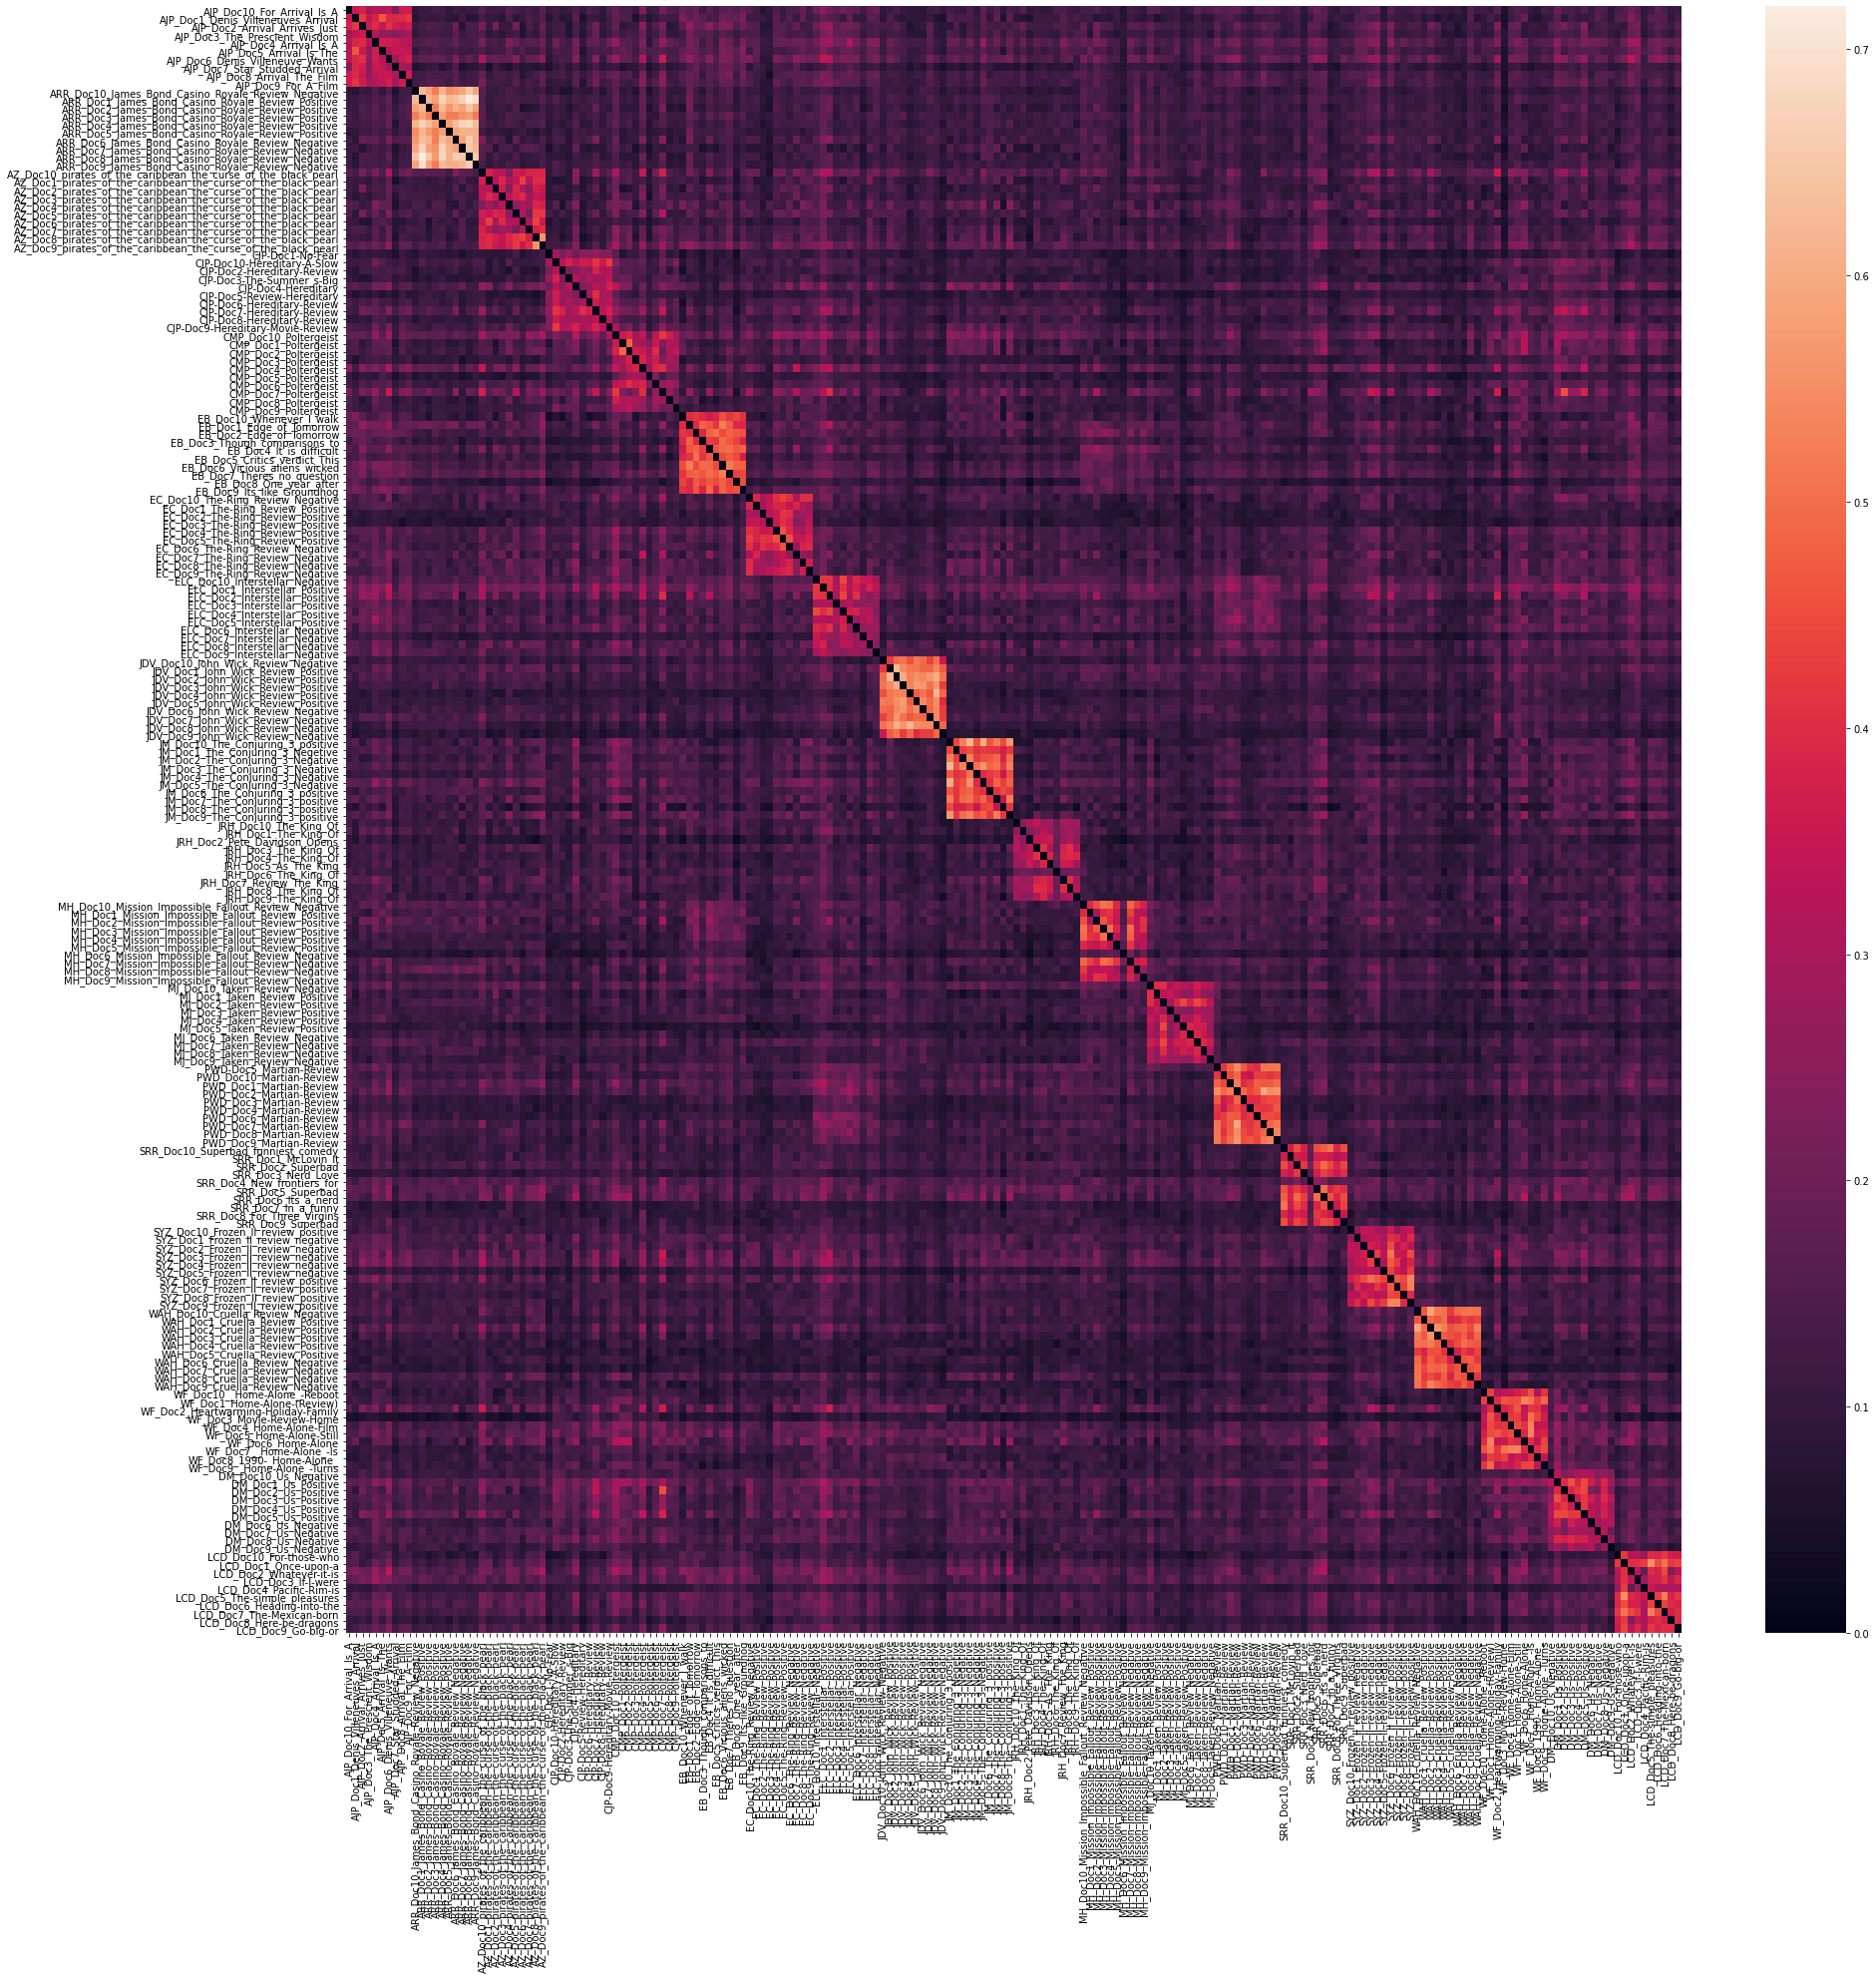

In [ ]:
#heatmap of cosine similarity of documents
similarity  = cosine_similarity(df, df)
np.fill_diagonal(similarity,0)
import seaborn as sns

from matplotlib import pyplot
import seaborn


a4_dims = (30, 30)

fig, ax = pyplot.subplots(figsize=a4_dims)

seaborn.heatmap(ax=ax, data=similarity, xticklabels= titles, yticklabels=titles)




# EXPERIMENT 2B (TDM Matrix - Frequency)

Brownlee_Chapter_8&9_The_Bag-of-Words_Model

In [ ]:
# load all docs in a directory 

def process_docs_exp2(text, vocab): 
  for doc in text:
    add_doc_to_vocab_exp2(doc, vocab)

In [ ]:
def add_doc_to_vocab_exp2(doc, vocab): 
  # clean doc 
  tokens = clean_doc_exp1(doc) 
  # update counts 
  vocab.update(tokens)


In [ ]:
# define vocab 
vocab = Counter() 
# add all docs to vocab 
process_docs_exp2(text, vocab) 
# print the size of the vocab 
print(len(vocab))

16237


In [ ]:
vocab.most_common(20)

[('film', 611),
 ('one', 540),
 ('movie', 470),
 ('like', 428),
 ('time', 341),
 ('even', 253),
 ('also', 245),
 ('much', 230),
 ('first', 225),
 ('story', 224),
 ('us', 217),
 ('way', 216),
 ('bond', 211),
 ('movies', 201),
 ('get', 187),
 ('two', 186),
 ('action', 167),
 ('made', 166),
 ('never', 164),
 ('little', 161)]

In [ ]:
def clean_doc_exp2(doc): 
  tokens = doc.split()
  # convert to lower case ADDED
  tokens = [word.lower() for word in tokens]
  # prepare regex for char filtering 
  re_punc = re.compile('[%s]' % re.escape(string.punctuation)) 
  # remove punctuation from each word 
  tokens = [re_punc.sub('', w) for w in tokens] 
  # remove remaining tokens that are not alphabetic 
  tokens = [word for word in tokens if word.isalpha()] 
  # filter out stop words 
  stop_words = set(stopwords.words('english')) 
  tokens = [w for w in tokens if not w in stop_words] 
  # filter out short tokens 
  tokens = [word for word in tokens if len(word) > 1]
  lem = WordNetLemmatizer()
  temp_tokens = tokens.copy()
  tokens = ' '.join([lem.lemmatize(w) for w in temp_tokens])
  tokens = tokens.split()
  most_freq = set(['one', 'like', 'get', 'also',
                   'much', 'u', 'first', 'word',
                   'two', 'made', 'take', 'thing',
                   'come', 'go'])
  tokens = [w for w in tokens if not w in most_freq] 
  return tokens

In [ ]:
def add_doc_to_vocab_exp2(doc, vocab): 
  # clean doc 
  tokens = clean_doc_exp2(doc) 
  # update counts 
  vocab.update(tokens)


In [ ]:
# define vocab 
vocab = Counter() 
# add all docs to vocab 
process_docs_exp2(text, vocab) 
# print the size of the vocab 
vocab.most_common(20)

[('film', 766),
 ('movie', 671),
 ('time', 399),
 ('make', 257),
 ('character', 256),
 ('even', 253),
 ('story', 249),
 ('way', 246),
 ('bond', 246),
 ('scene', 183),
 ('action', 174),
 ('world', 170),
 ('never', 164),
 ('family', 162),
 ('little', 161),
 ('new', 158),
 ('life', 158),
 ('good', 151),
 ('home', 147),
 ('though', 146)]

In [ ]:
len(vocab)

14597

# EXPERIMENT 3B

In [ ]:
# clean and return line of tokens 

def doc_to_line(doc, vocab): 
  # clean doc 
  tokens = clean_doc_exp2(doc) 
  # filter by vocab 
  tokens = [w for w in tokens if w in vocab] 
  return ' '.join(tokens)

In [ ]:
def process_docs_exp3(text, vocab): 
  lines = list() 
  for doc in text:
    line = doc_to_line(doc, vocab) 
  # add to list 
    lines.append(line) 
  return lines

In [ ]:
exp3_text = process_docs_exp3(text, vocab)

In [ ]:
tokens = []

for doc in exp3_text:
  temp_tokens = clean_doc_exp1(doc)
  tokens.append(temp_tokens)

In [ ]:
bow_all = []

for i in range(len(tokens)):
  bag_of_words = Counter(tokens[i])
  bow = bag_of_words.most_common(4)
  bow_all.append(bow)

In [ ]:
bow_all

[[('alien', 5), ('film', 4), ('every', 4), ('language', 4)],
 [('louise', 9), ('arrival', 8), ('alien', 7), ('movie', 4)],
 [('adam', 9), ('arrival', 6), ('world', 5), ('language', 5)],
 [('film', 7), ('story', 6), ('future', 6), ('louise', 5)],
 [('arrival', 14), ('different', 12), ('language', 11), ('world', 11)],
 [('know', 8), ('louise', 7), ('heptapods', 7), ('world', 6)],
 [('film', 8), ('movie', 7), ('arrival', 6), ('alien', 5)],
 [('villeneuves', 6), ('arrival', 5), ('day', 4), ('world', 4)],
 [('alien', 5), ('something', 5), ('louise', 4), ('make', 3)],
 [('arrival', 6), ('film', 5), ('alien', 5), ('louise', 4)],
 [('bond', 12), ('casino', 6), ('royale', 5), ('film', 4)],
 [('bond', 39), ('film', 8), ('casino', 8), ('royale', 8)],
 [('bond', 16), ('film', 7), ('le', 6), ('chiffre', 6)],
 [('bond', 12), ('new', 3), ('film', 3), ('million', 3)],
 [('bond', 21), ('movie', 6), ('royale', 5), ('film', 5)],
 [('bond', 20), ('craig', 5), ('new', 4), ('fleming', 4)],
 [('bond', 24), (

# EXPERIMENT 4B

Lane_Chapter_3_TF-IDF_Vectors

This determines Cosine Similarity for a TDM (using Frequencies)

In [ ]:
zero_vector = OrderedDict((token, 0) for token in vocab)
len(zero_vector)

14597

In [ ]:
zero_vector.keys()

odict_keys(['canadian', 'director', 'denis', 'villeneuve', 'great', 'film', 'called', 'prisoner', 'provocative', 'enthralling', 'beautifully', 'composed', 'peeled', 'away', 'layer', 'complex', 'mystery', 'story', 'surprise', 'every', 'frame', 'instant', 'fan', 'promising', 'relationship', 'heartbreaking', 'finale', 'since', 'enemy', 'sicario', 'unspeakable', 'disaster', 'arrival', 'latest', 'exercise', 'pretentious', 'poopery', 'give', 'reason', 'believe', 'parted', 'company', 'good', 'tv', 'anchorman', 'channel', 'pour', 'news', 'unidentified', 'flying', 'saucer', 'landed', 'throughout', 'world', 'place', 'far', 'afield', 'russia', 'venezuela', 'montana', 'border', 'closed', 'tell', 'donald', 'trump', 'gas', 'limited', 'supply', 'way', 'escape', 'president', 'declares', 'state', 'emergency', 'enter', 'amy', 'adam', 'linguistics', 'professor', 'dr', 'louise', 'bank', 'jeremy', 'renner', 'theoretical', 'physicist', 'ian', 'donnelly', 'recruited', 'military', 'find', 'alien', 'want', 'de

In [ ]:
doc_vectors_dict = []
for doc in exp3_text:
  vec = copy.copy(zero_vector)
  tokens = doc.split()
  token_counts = Counter(tokens)
  for key, value in token_counts.items():
    vec[key] = value
  doc_vectors_dict.append(vec)

In [ ]:
doc_vectors_np = np.array(list(doc_vectors_dict[0].values()))

for i in range(len(doc_vectors_dict)-1):
  temp = np.array(list(doc_vectors_dict[i+1].values()))
  doc_vectors_np = np.vstack((doc_vectors_np, temp))

In [ ]:
###############################################################################
### Calculates the Cosine Similarity across your corpus using T-D matrix
###############################################################################
#doc_term_matrix = transformed_documents.todense()
df = pd.DataFrame(doc_vectors_np, 
                      columns=zero_vector.keys(), 
                      index=docids)
   
similarity  = cosine_similarity(df, df)

In [ ]:
df.head()

canadian  director  denis  ...  authorial  tiein  untransformed
0         1         1      2  ...          0      0              0
1         0         0      0  ...          0      0              0
2         0         2      1  ...          0      0              0
3         0         1      1  ...          0      0              0
4         0         1      1  ...          0      0              0

[5 rows x 14597 columns]

In [ ]:
similarity.shape

(200, 200)

In [ ]:
np.average(similarity)

0.14072702584064

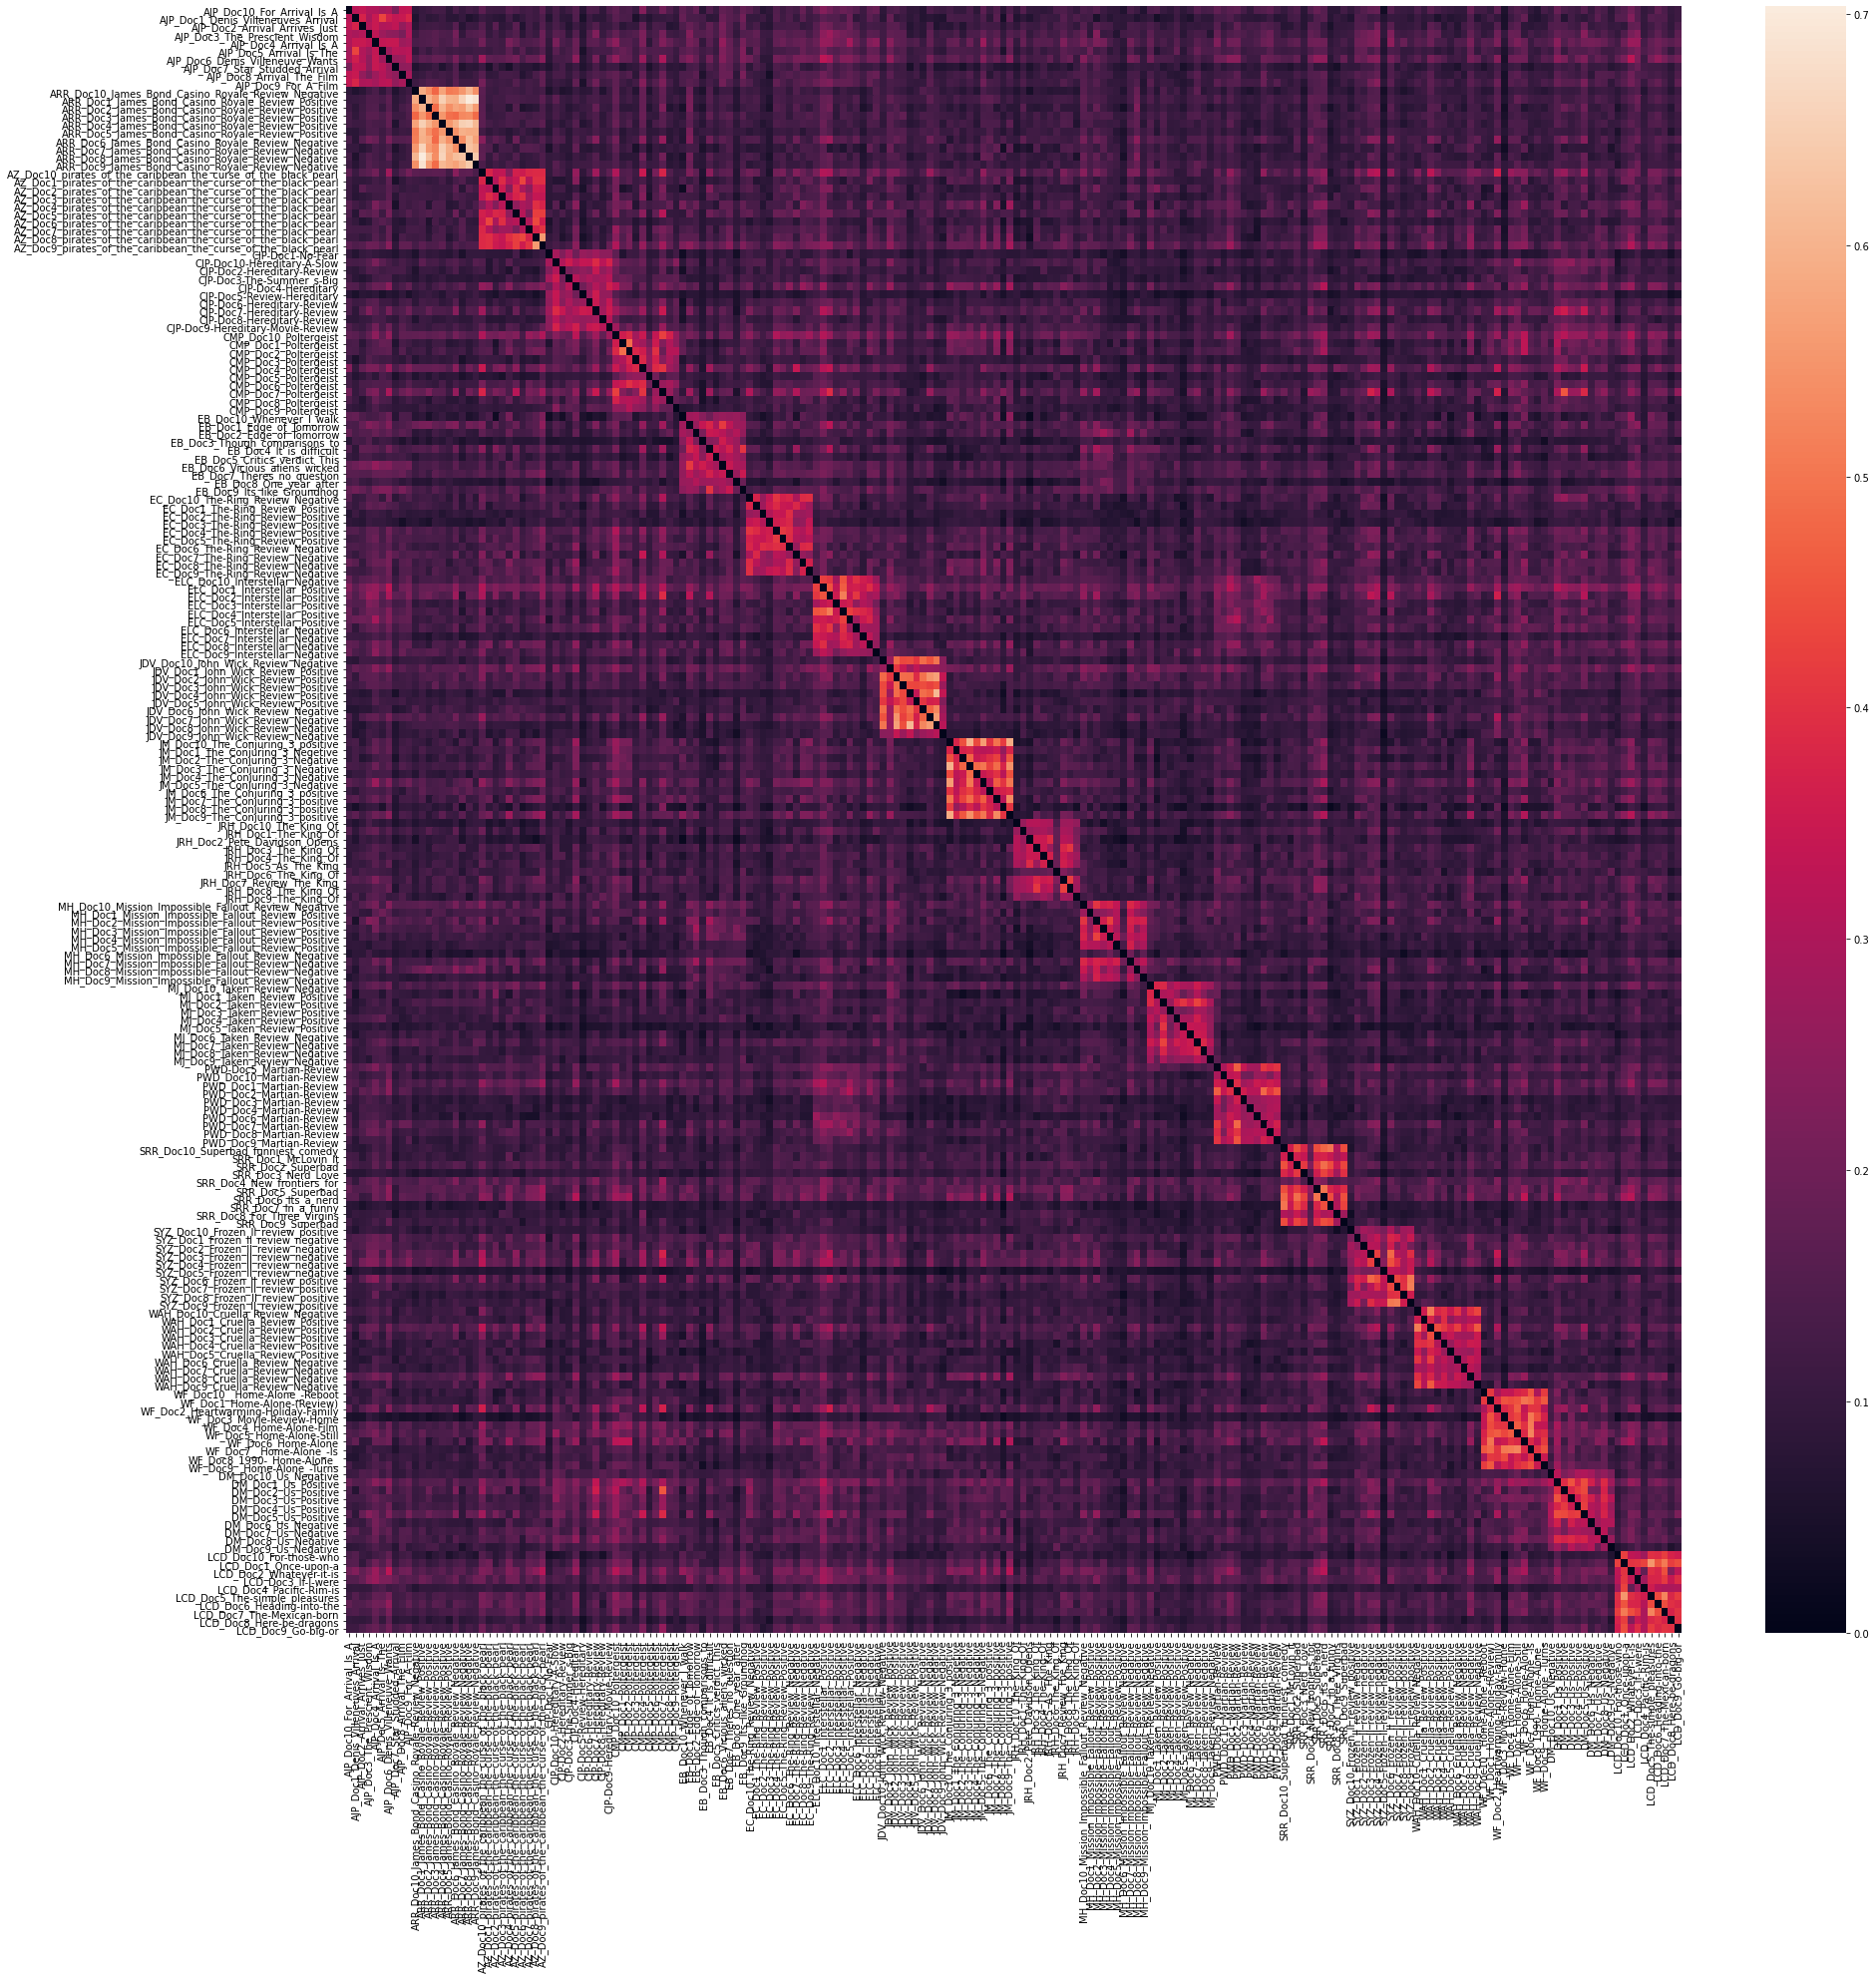

In [ ]:
#heatmap of cosine similarity of documents
similarity  = cosine_similarity(df, df)
np.fill_diagonal(similarity,0)
import seaborn as sns

from matplotlib import pyplot
import seaborn


a4_dims = (30, 30)

fig, ax = pyplot.subplots(figsize=a4_dims)

seaborn.heatmap(ax=ax, data=similarity, xticklabels= titles, yticklabels=titles)




# EXPERIMENT 5

In [ ]:
titles[50:60]

['EB_Doc10_Whenever_I_walk',
 'EB_Doc1_Edge_of_Tomorrow',
 'EB_Doc2_Edge_of_Tomorrow',
 'EB_Doc3_Though_comparisons_to',
 'EB_Doc4_It_is_difficult',
 'EB_Doc5_Critics_verdict_This',
 'EB_Doc6_Vicious_aliens_wicked',
 'EB_Doc7_Theres_no_question',
 'EB_Doc8_One_year_after',
 'EB_Doc9_Its_like_Groundhog']

In [ ]:
titles[110:120]

['MH_Doc10_Mission_Impossible_Fallout_Review_Negative',
 'MH_Doc1_Mission_Impossible_Fallout_Review_Positive',
 'MH_Doc2_Mission_Impossible_Fallout_Review_Positive',
 'MH_Doc3_Mission_Impossible_Fallout_Review_Positive',
 'MH_Doc4_Mission_Impossible_Fallout_Review_Positive',
 'MH_Doc5_Mission_Impossible_Fallout_Review_Positive',
 'MH_Doc6_Mission_Impossible_Fallout_Review_Negative',
 'MH_Doc7_Mission_Impossible_Fallout_Review_Negative',
 'MH_Doc8_Mission_Impossible_Fallout_Review_Negative',
 'MH_Doc9_Mission_Impossible_Fallout_Review_Negative']

In [ ]:
doc_vectors_np_exp5 = doc_vectors_np[50:60]

In [ ]:
doc_vectors_np_exp52 = doc_vectors_np[110:120]

In [ ]:
###############################################################################
### Calculates the Cosine Similarity across your corpus using TFIDF matrix
###############################################################################
#doc_term_matrix = transformed_documents.todense()
df1 = pd.DataFrame(doc_vectors_np_exp5, 
                      columns=zero_vector.keys(), 
                      index=docids[50:60])

df2 = pd.DataFrame(doc_vectors_np_exp52, 
                      columns=zero_vector.keys(), 
                      index=docids[110:120])

df = pd.concat([df1,df2])

similarity  = cosine_similarity(df, df)

In [ ]:
df.head()

canadian  director  denis  ...  authorial  tiein  untransformed
50         0         2      0  ...          0      0              0
51         0         0      0  ...          0      0              0
52         0         1      0  ...          0      0              0
53         0         0      0  ...          0      0              0
54         0         1      0  ...          0      0              0

[5 rows x 14597 columns]

In [ ]:
similarity.shape

(20, 20)

In [ ]:
np.average(similarity)

0.2605199361561043

In [ ]:
docids_exp5 = docids[50:60] + docids[110:120] 

In [ ]:
titles_exp5 = titles[50:60] + titles[110:120] 

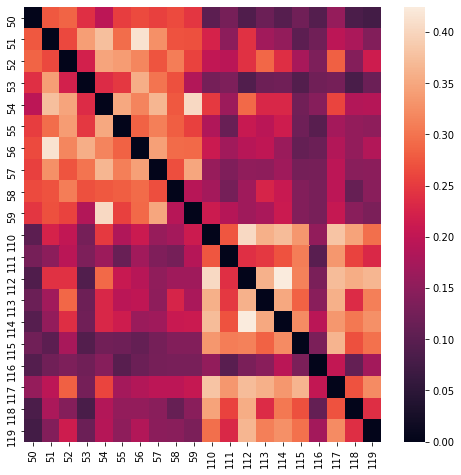

In [ ]:
#heatmap of cosine similarity of documents
similarity  = cosine_similarity(df, df)
np.fill_diagonal(similarity,0)
import seaborn as sns

from matplotlib import pyplot
import seaborn


a4_dims = (8, 8)

fig, ax = pyplot.subplots(figsize=a4_dims)

#sns.set(font_scale=10)

seaborn.heatmap(ax=ax, data=similarity, xticklabels=docids_exp5, yticklabels=docids_exp5)

In [ ]:
titles[52]

'EB_Doc2_Edge_of_Tomorrow'

In [ ]:
titles[113]

'MH_Doc3_Mission_Impossible_Fallout_Review_Positive'

In [ ]:
tokens = clean_doc_exp2(text[52])
vocab = Counter()
vocab.update(tokens)
vocab.most_common(10)

[('cruise', 10),
 ('tom', 4),
 ('mimic', 4),
 ('story', 4),
 ('movie', 4),
 ('flick', 3),
 ('rita', 3),
 ('something', 3),
 ('action', 3),
 ('may', 2)]

In [ ]:
tokens = clean_doc_exp2(text[113])
vocab = Counter()
vocab.update(tokens)
vocab.most_common(10)

[('cruise', 6),
 ('make', 3),
 ('best', 3),
 ('action', 3),
 ('world', 3),
 ('character', 3),
 ('would', 2),
 ('agent', 2),
 ('hunt', 2),
 ('impossible', 2)]

# EXPERIMENT 6

In [ ]:
document_tfidf_vectors_exp7 = []
for doc in exp3_text:
  vec = copy.copy(zero_vector)
  tokens = doc.split()
  token_counts = Counter(tokens)
  for key, value in token_counts.items():
    docs_containing_key = 0
    for _doc in exp3_text:
      if key in _doc:
        docs_containing_key += 1
        tf = value / len(vocab)
        if docs_containing_key:
          idf = len(exp3_text) / docs_containing_key
        else:
          idf = 0
        vec[key] = tf * idf
  document_tfidf_vectors_exp7.append(vec)

In [ ]:
df.shape

(20, 14597)

In [ ]:
np_tfidf_vectors_exp7 = np.array(list(document_tfidf_vectors_exp7[0].values()))

for i in range(len(document_tfidf_vectors_exp7)-1):
  temp = np.array(list(document_tfidf_vectors_exp7[i+1].values()))
  np_tfidf_vectors_exp7 = np.vstack((np_tfidf_vectors_exp7, temp))

In [ ]:
np_tfidf_vectors_exp7

array([[0.42016807, 0.0067769 , 0.18674136, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01355381, 0.09337068, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01355381, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0067769 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0067769 , 0.        , ..., 0.84033613, 0.84033613,
        0.84033613]])

In [ ]:
###############################################################################
### Calculates the Cosine Similarity across your corpus using T-D matrix
###############################################################################
#doc_term_matrix = transformed_documents.todense()
df = pd.DataFrame(np_tfidf_vectors_exp7, 
                      columns=zero_vector.keys(), 
                      index=docids)
   
similarity  = cosine_similarity(df, df)

In [ ]:
df.head()

canadian  director     denis  ...  authorial  tiein  untransformed
0  0.420168  0.006777  0.186741  ...        0.0    0.0            0.0
1  0.000000  0.000000  0.000000  ...        0.0    0.0            0.0
2  0.000000  0.013554  0.093371  ...        0.0    0.0            0.0
3  0.000000  0.006777  0.093371  ...        0.0    0.0            0.0
4  0.000000  0.006777  0.093371  ...        0.0    0.0            0.0

[5 rows x 14597 columns]

In [ ]:
similarity.shape

(200, 200)

In [ ]:
np.average(similarity)

0.008362042282472663

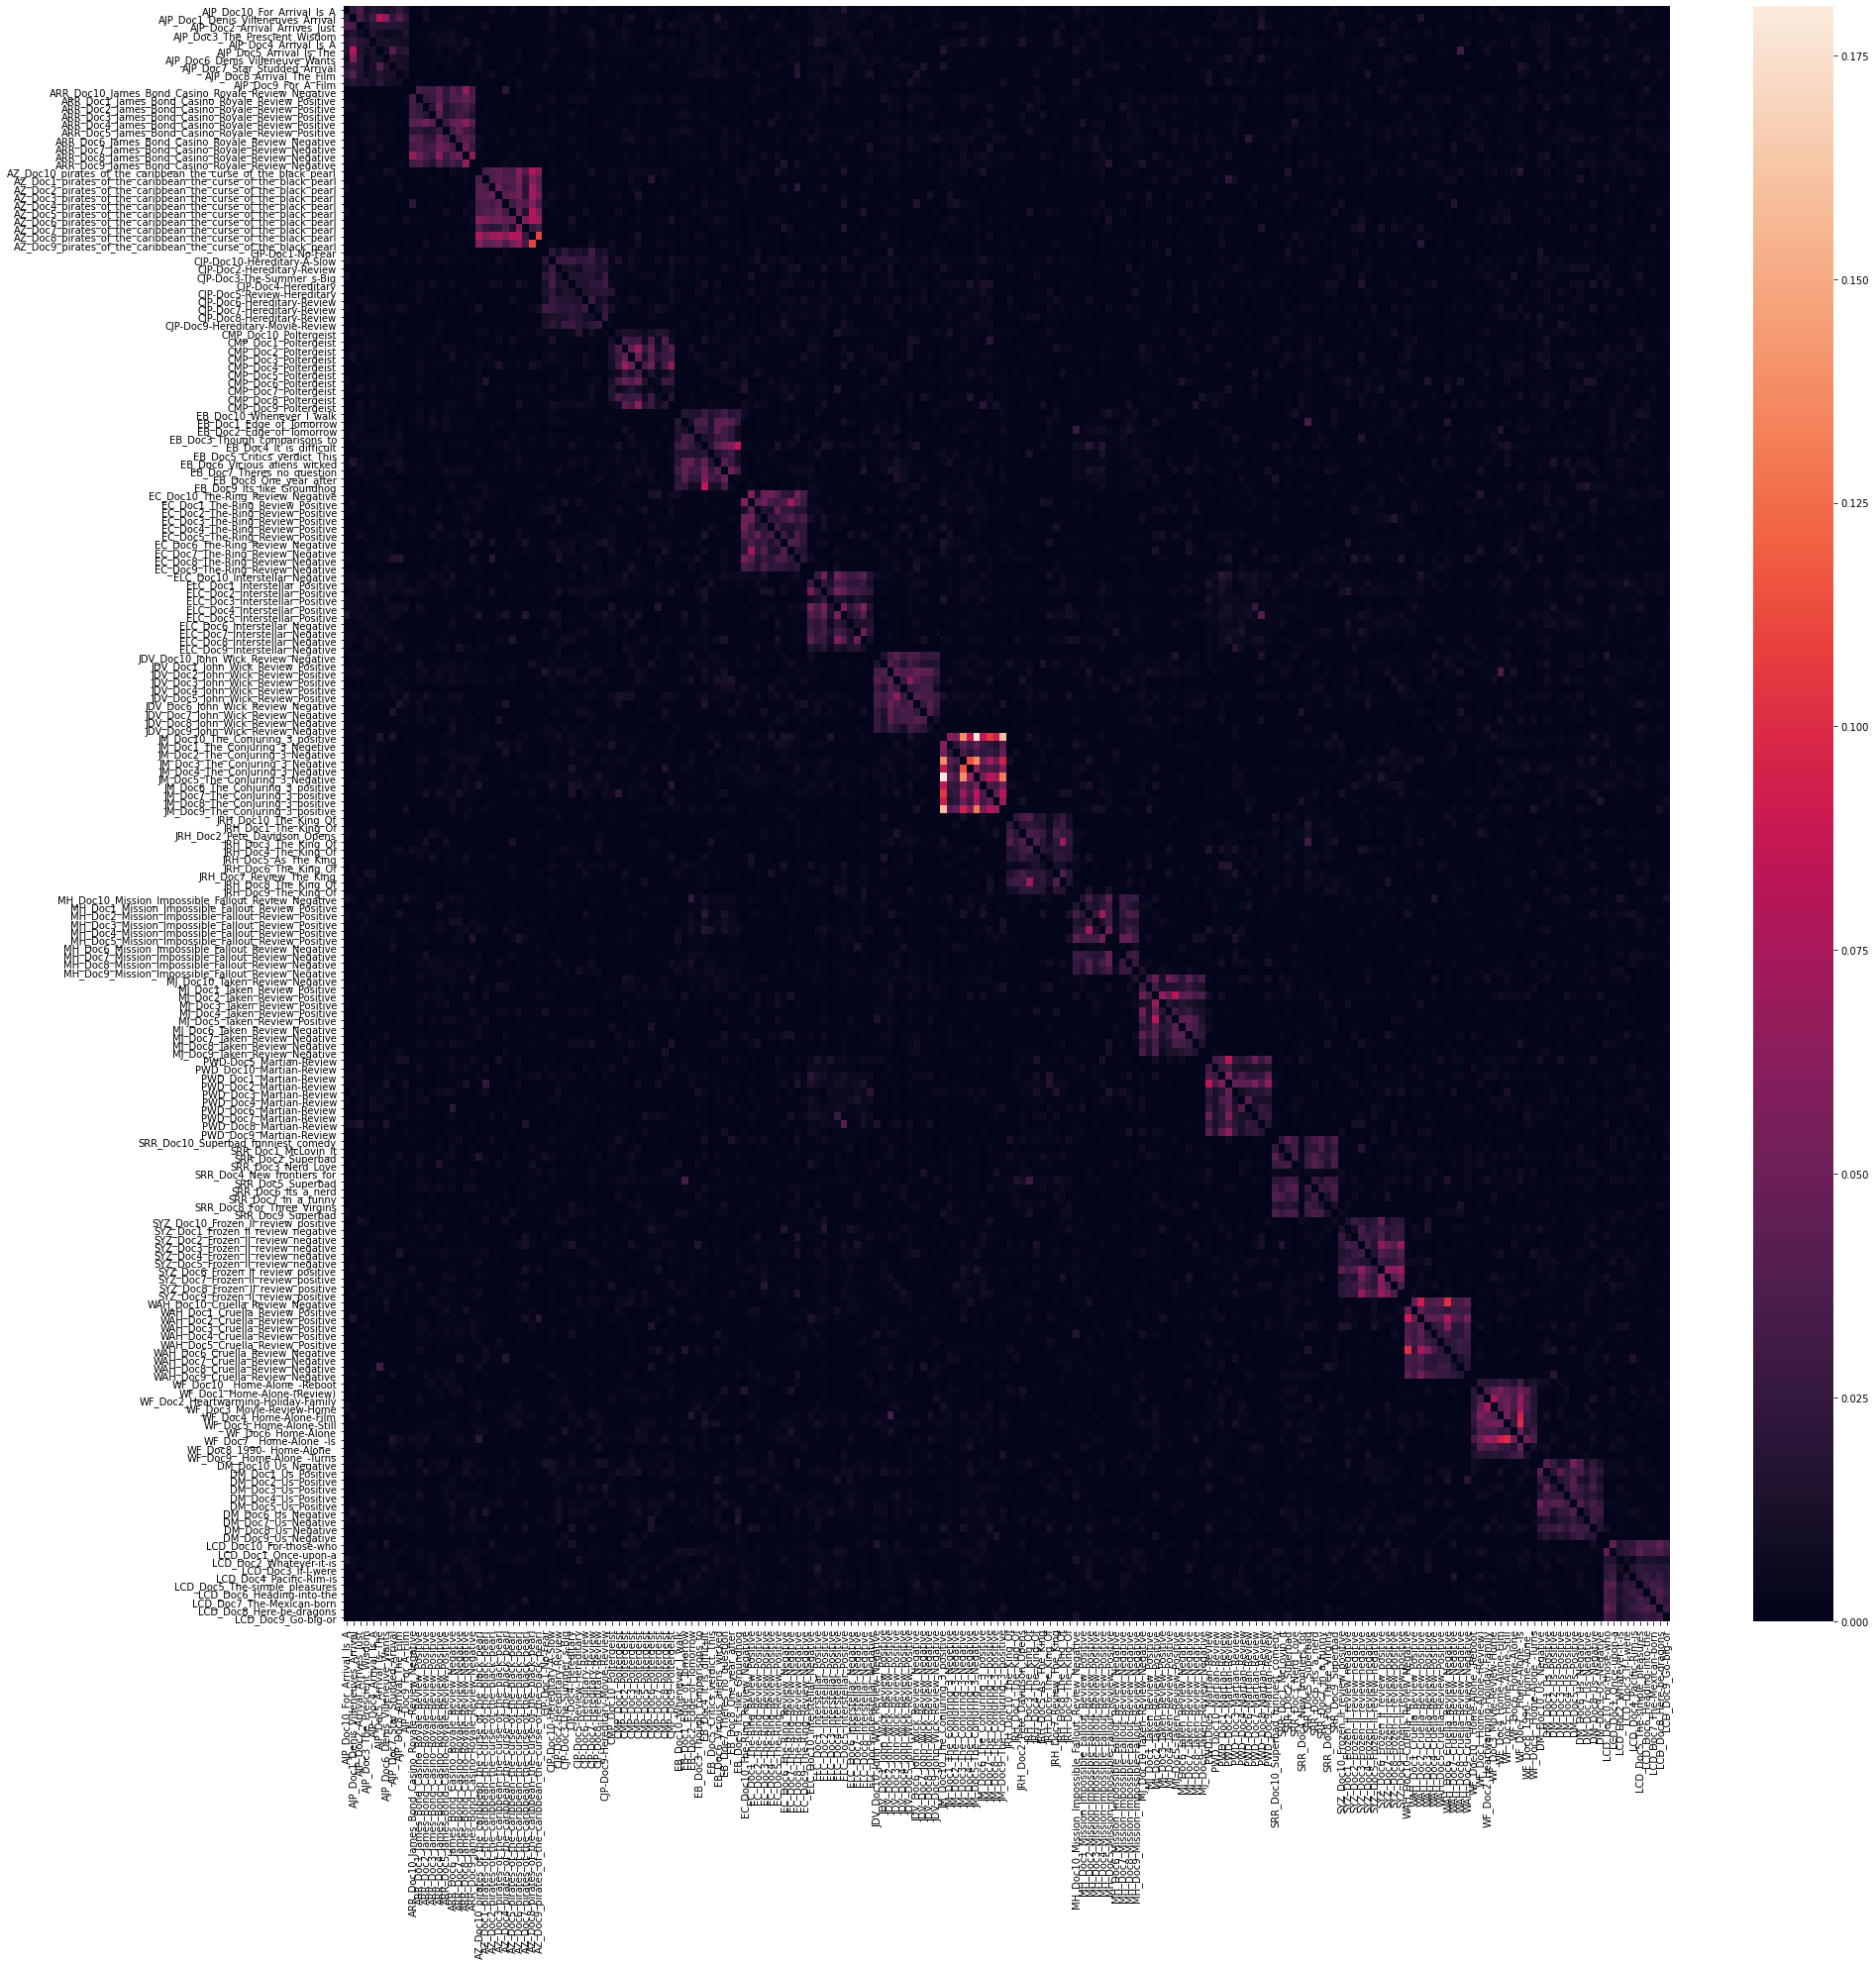

In [ ]:
#heatmap of cosine similarity of documents
similarity  = cosine_similarity(df, df)
np.fill_diagonal(similarity,0)
import seaborn as sns

from matplotlib import pyplot
import seaborn


a4_dims = (30, 30)

fig, ax = pyplot.subplots(figsize=a4_dims)
#sns.set(font_scale=0.1)
seaborn.heatmap(ax=ax, data=similarity, xticklabels= titles, yticklabels=titles)




In [ ]:
titles[70:80]

['ELC_Doc10_Interstellar_Negative',
 'ELC_Doc1_Interstellar_Positive',
 'ELC_Doc2_Interstellar_Positive',
 'ELC_Doc3_Interstellar_Positive',
 'ELC_Doc4_Interstellar_Positive',
 'ELC_Doc5_Interstellar_Positive',
 'ELC_Doc6_Interstellar_Negative',
 'ELC_Doc7_Interstellar_Negative',
 'ELC_Doc8_Interstellar_Negative',
 'ELC_Doc9_Interstellar_Negative']

In [ ]:
titles[130:140]

['PWD-Doc5_Martian-Review',
 'PWD_Doc10_Martian-Review',
 'PWD_Doc1_Martian-Review',
 'PWD_Doc2_Martian-Review',
 'PWD_Doc3_Martian-Review',
 'PWD_Doc4_Martian-Review',
 'PWD_Doc6_Martian-Review',
 'PWD_Doc7_Martian-Review',
 'PWD_Doc8_Martian-Review',
 'PWD_Doc9_Martian-Review']

In [ ]:
doc_vectors_np_exp71 = doc_vectors_np[70:80]

In [ ]:
doc_vectors_np_exp72 = doc_vectors_np[130:140]

In [ ]:
###############################################################################
### Calculates the Cosine Similarity across your corpus using TFIDF matrix
###############################################################################
#doc_term_matrix = transformed_documents.todense()
df1 = pd.DataFrame(doc_vectors_np_exp71, 
                      columns=zero_vector.keys(), 
                      index=docids[70:80])

df2 = pd.DataFrame(doc_vectors_np_exp72, 
                      columns=zero_vector.keys(), 
                      index=docids[130:140])

df = pd.concat([df1,df2])

similarity  = cosine_similarity(df, df)

In [ ]:
df.head()

canadian  director  denis  ...  authorial  tiein  untransformed
70         0         2      0  ...          0      0              0
71         0         2      0  ...          0      0              0
72         0         0      0  ...          0      0              0
73         0         0      0  ...          0      0              0
74         0         0      0  ...          0      0              0

[5 rows x 14597 columns]

In [ ]:
similarity.shape

(20, 20)

In [ ]:
np.average(similarity)

0.2962681235578083

In [ ]:
docids_exp7 = docids[70:80] + docids[130:140] 

In [ ]:
titles_exp7 = titles[70:80] + titles[130:140] 

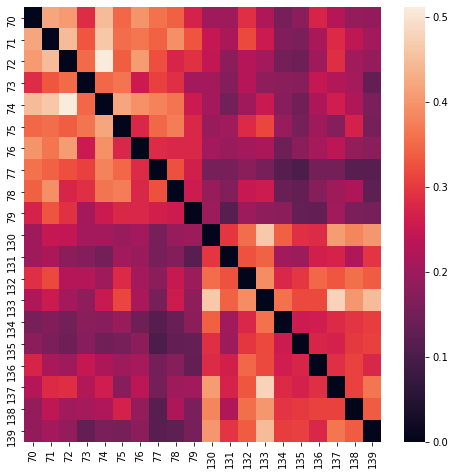

In [ ]:
#heatmap of cosine similarity of documents
similarity  = cosine_similarity(df, df)
np.fill_diagonal(similarity,0)
import seaborn as sns

from matplotlib import pyplot
import seaborn


a4_dims = (8, 8)

fig, ax = pyplot.subplots(figsize=a4_dims)

#sns.set(font_scale=10)

seaborn.heatmap(ax=ax, data=similarity, xticklabels=docids_exp7, yticklabels=docids_exp7)

In [ ]:
titles[70]

'ELC_Doc10_Interstellar_Negative'

In [ ]:
titles[136]

'PWD_Doc6_Martian-Review'

In [ ]:
tokens = clean_doc_exp2(text[70])
vocab = Counter()
vocab.update(tokens)
vocab.most_common(10)

[('cooper', 11),
 ('space', 8),
 ('earth', 8),
 ('time', 6),
 ('dark', 5),
 ('knight', 5),
 ('film', 5),
 ('far', 5),
 ('character', 4),
 ('nolan', 4)]

In [ ]:
tokens = clean_doc_exp2(text[136])
vocab = Counter()
vocab.update(tokens)
vocab.most_common(10)

[('space', 12),
 ('science', 5),
 ('weir', 5),
 ('manned', 5),
 ('watney', 4),
 ('various', 4),
 ('film', 3),
 ('martian', 3),
 ('novel', 3),
 ('crew', 3)]

In [ ]:
###############################################################################
### Calculates TFIDF and Saves TFIDF values for terms to a file
###############################################################################
vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(text)
transformed_documents_as_array = transformed_documents.toarray()

####################################################################################
# NOTE THIS SAVE A FILE FOR EACH DOCUMENT TO YOUR HARD DRIVE
# It first creates a directory called td_idf_output
# Then for each document it will generate a file with the words and tf idf scores
###################################################################################
output_dir ="td_idf_output"
top_50 = pd.DataFrame()
top_10 = pd.DataFrame()

import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    count=str(counter)
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    t=one_doc_as_df['term'].head(10)
    top_10[count] = t
    f=one_doc_as_df['term'].head(50)
    top_50[count] = f

    # output to a csv using the enumerated value for the filename
    one_doc_as_df.to_csv(output_dir+"/"+str(titles[counter]))
    


In [ ]:
top_10

0           1            2  ...       197       198        199
0  language      louise        adams  ...       rim     kaiju       toro
1      grab     arrival      arrival  ...   pacific  monsters        del
2    aliens      aliens       louise  ...       del   monster     jaeger
3     adams       adams     language  ...      toro   jaegers     robots
4    future      memory      message  ...     kaiju    jaeger   monsters
5    linear    language   villeneuve  ...    robots      toro      pilot
6   arrival  villeneuve  cooperation  ...      elba       del      kaiju
7     smash     contact    heisserer  ...  monsters      pair        rim
8    cancer      return       renner  ...     giant   dragons    achieve
9     space        like        twist  ...    hunnam    mainly  pondering

[10 rows x 200 columns]

In [ ]:
tfidf_10 = list(top_10.stack())

In [ ]:
tfidf_bow_10 = Counter()
tfidf_bow_10.update(tfidf_10)
tfidf_bow_10.most_common(10)

[('film', 19),
 ('cruise', 17),
 ('apatow', 13),
 ('scott', 13),
 ('john', 12),
 ('family', 12),
 ('horror', 11),
 ('nolan', 11),
 ('bond', 10),
 ('depp', 10)]

In [ ]:
tfidf_50 = list(top_50.stack())

In [ ]:
tfidf_bow_50 = Counter()
tfidf_bow_50.update(tfidf_50)
tfidf_bow_50.most_common(10)

[('film', 56),
 ('movie', 39),
 ('like', 23),
 ('horror', 22),
 ('family', 21),
 ('cruise', 19),
 ('apatow', 18),
 ('scott', 17),
 ('space', 16),
 ('nasa', 16)]

In [ ]:
###############################################################################
### Calculates TFIDF and Saves TFIDF values for terms to a file
###############################################################################
vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(exp3_text)
transformed_documents_as_array = transformed_documents.toarray()

####################################################################################
# NOTE THIS SAVE A FILE FOR EACH DOCUMENT TO YOUR HARD DRIVE
# It first creates a directory called td_idf_output
# Then for each document it will generate a file with the words and tf idf scores
###################################################################################
output_dir ="td_idf_output"
top_50 = pd.DataFrame()
top_10 = pd.DataFrame()

import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    count=str(counter)
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    t=one_doc_as_df['term'].head(10)
    top_10[count] = t
    f=one_doc_as_df['term'].head(50)
    top_50[count] = f

    # output to a csv using the enumerated value for the filename
    one_doc_as_df.to_csv(output_dir+"/"+str(titles[counter]))
    


In [ ]:
tfidf = list(top_50.stack())

In [ ]:
tfidf_bow = Counter()
tfidf_bow.update(tfidf)
tfidf_bow.most_common(10)

[('film', 57),
 ('movie', 49),
 ('horror', 23),
 ('family', 22),
 ('action', 22),
 ('alien', 19),
 ('character', 19),
 ('cruise', 18),
 ('planet', 17),
 ('time', 17)]

In [ ]:
tfidf = list(top_10.stack())

In [ ]:
tfidf_bow = Counter()
tfidf_bow.update(tfidf)
tfidf_bow.most_common(10)

[('film', 23),
 ('movie', 18),
 ('cruise', 15),
 ('horror', 14),
 ('family', 13),
 ('scott', 12),
 ('alien', 12),
 ('bond', 10),
 ('john', 10),
 ('warren', 10)]

# EXPERIMENT 7

In [ ]:
###############################################################################
### Functions to visualize documents
###############################################################################

def clean_doc(doc): 
  tokens = doc.split()
  # convert to lower case ADDED
  tokens = [word.lower() for word in tokens]
  # prepare regex for char filtering 
  re_punc = re.compile('[%s]' % re.escape(string.punctuation)) 
  # remove punctuation from each word 
  tokens = [re_punc.sub('', w) for w in tokens] 
  # remove remaining tokens that are not alphabetic 
  tokens = [word for word in tokens if word.isalpha()] 
  # filter out stop words 
  stop_words = set(stopwords.words('english')) 
  tokens = [w for w in tokens if not w in stop_words] 
  # filter out short tokens 
  tokens = [word for word in tokens if len(word) > 1]
  lem = WordNetLemmatizer()
  temp_tokens = tokens.copy()
  tokens = ' '.join([lem.lemmatize(w) for w in temp_tokens])
  tokens = tokens.split()
  most_freq = set(['one', 'like', 'get', 'also',
                   'much', 'u', 'first', 'word',
                   'two', 'made', 'take', 'thing',
                   'come', 'go'])
  tokens = [w for w in tokens if not w in most_freq] 
  return tokens

def process_corpus(data):
        
    #create empty list to store text documents titles
    titles=[]
    
    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        temp_text=data['DSI_Title'].iloc[i]
        titles.append(temp_text)
    
    #create empty list to store text documents
    text_body=[]
    
    #for loop which appends the text to the text_body list
    for i in range(0,len(data)):
        temp_text=data['Text'].iloc[i]
        text_body.append(temp_text)
    
    #Note: the text_body is the unprocessed list of documents read directly form 
    #the csv.
        
    #empty list to store processed documents
    processed_text=[]
    #for loop to process the text to the processed_text list
    for i in text_body:
        text=clean_doc(i)
        processed_text.append(text)
    
    #Note: the processed_text is the PROCESSED list of documents read directly form 
    #the csv.  Note the list of words is separated by commas.
    
    
    #stitch back together individual words to reform body of text
    final_processed_text=[]
    
    for i in processed_text:
        temp_DSI=i[0]
        for k in range(1,len(i)):
            temp_DSI=temp_DSI+' '+i[k]
        final_processed_text.append(temp_DSI)
    
    return titles, final_processed_text, processed_text

def run_doc2vec(final_processed_text, processed_text):
    #create doc2vec matrix
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text)]
    model = Doc2Vec(documents, vector_size=100, window=3, min_count=2, workers=4)    
    
    doc2vec_df=pd.DataFrame()
    for i in range(0,len(processed_text)):
        vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
        doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)
        
    return doc2vec_df

def run_word2vec(processed_text):

    #word to vec model
    model_w2v = Word2Vec(processed_text, size=100, window=3, min_count=2, workers=4)
    
    labels = []
    tokens = []

    for word in model_w2v.wv.vocab:
        tokens.append(model_w2v[word])
        labels.append(word)
    
    
    return labels, tokens, model_w2v





def plot_doc2vec(doc2vec_df, titles,_perplexity=10):
    #visualize documents through applying TSNE to doc2vec matrix
    tsne_model = TSNE(perplexity=_perplexity, n_components=2, init='pca', n_iter=2500, random_state=23)
    doc2vec_df = tsne_model.fit_transform(doc2vec_df)
    x = []
    y = []
    for value in doc2vec_df:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(titles[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    

def plot_word2vec(model, labels, tokens, _perplexity=30):
    "Creates and TSNE model and plots it"
    words = []
    embeddings = []
    for word in list(model.wv.vocab):
        embeddings.append(model.wv[word])
        words.append(word)

    tsne_model= TSNE(perplexity=_perplexity, n_components=2, init='pca', n_iter=3500, random_state=32)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(40, 40)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

    

In [ ]:
#create word and document embedding

#cleans text to get processed text
titles, final_processed_text, processed_text = process_corpus(data)

#word to vec
model_w2v = Word2Vec(processed_text, size=1000, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()

w2v_df.head(10)

0         1         2    ...       997       998       999
instance      0.000409 -0.001163  0.000912  ... -0.000766 -0.000011 -0.000264
stellar      -0.000002 -0.000567 -0.000239  ...  0.000167 -0.000071 -0.000411
bed           0.000040 -0.000408  0.001040  ... -0.001053  0.000642 -0.000077
ended         0.000387  0.000096  0.000028  ... -0.000527 -0.000282 -0.000409
incidentally  0.000263 -0.000015 -0.000024  ... -0.000456 -0.000137  0.000419
rung         -0.000462 -0.000137  0.000376  ...  0.000043 -0.000065 -0.000325
ideas         0.000746 -0.000514  0.001075  ... -0.001113 -0.000035 -0.000101
lack          0.000531 -0.000343  0.000355  ... -0.000717 -0.000088  0.000471
profanity     0.000269 -0.000219  0.000140  ... -0.000372 -0.000194 -0.000230
youat         0.000142  0.000091 -0.000006  ...  0.000234 -0.000464  0.000267

[10 rows x 1000 columns]

In [ ]:
###############################################################################
### Calculates the Cosine Similarity across your corpus using T-D matrix
###############################################################################
#doc_term_matrix = transformed_documents.todense()
#df = pd.DataFrame(np_tfidf_vectors_exp7, 
#                      columns=zero_vector.keys(), 
#                      index=docids)
   
similarity  = cosine_similarity(w2v_df, w2v_df)

In [ ]:
similarity.shape

(17082, 17082)

In [ ]:
np.average(similarity)

0.07108198

In [ ]:
w1 = 'film'
model_w2v.wv.most_similar(positive=w1)

[('time', 0.9979844689369202),
 ('story', 0.9978561401367188),
 ('action', 0.9970706701278687),
 ('bond', 0.9970390796661377),
 ('world', 0.99693763256073),
 ('theres', 0.9969151020050049),
 ('new', 0.9968846440315247),
 ('hes', 0.9968371391296387),
 ('character', 0.9967999458312988),
 ('family', 0.9967818260192871)]

# EXPERIMENT 8

### Allow Most Frequent

In [ ]:
#Allow Most Frequent

def clean_doc(doc): 
  tokens = doc.split()
  # convert to lower case ADDED
  tokens = [word.lower() for word in tokens]
  # prepare regex for char filtering 
  re_punc = re.compile('[%s]' % re.escape(string.punctuation)) 
  # remove punctuation from each word 
  tokens = [re_punc.sub('', w) for w in tokens] 
  # remove remaining tokens that are not alphabetic 
  tokens = [word for word in tokens if word.isalpha()] 
  # filter out stop words 
  stop_words = set(stopwords.words('english')) 
  tokens = [w for w in tokens if not w in stop_words] 
  # filter out short tokens 
  tokens = [word for word in tokens if len(word) > 1]
  lem = WordNetLemmatizer()
  temp_tokens = tokens.copy()
  tokens = ' '.join([lem.lemmatize(w) for w in temp_tokens])
  tokens = tokens.split()
  # most_freq = set(['one', 'like', 'get', 'also',
  #                  'much', 'u', 'first', 'word',
  #                  'two', 'made', 'take', 'thing',
  #                  'come', 'go'])
  # tokens = [w for w in tokens if not w in most_freq] 
  return tokens

In [ ]:
#create word and document embedding

#cleans text to get processed text
titles, final_processed_text, processed_text = process_corpus(data)

#word to vec
model_w2v = Word2Vec(processed_text, size=1000, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()

#w2v_df.head(10)

In [ ]:
###############################################################################
### Calculates the Cosine Similarity across your corpus using T-D matrix
###############################################################################
#doc_term_matrix = transformed_documents.todense()
#df = pd.DataFrame(np_tfidf_vectors_exp7, 
#                      columns=zero_vector.keys(), 
#                      index=docids)
   
similarity  = cosine_similarity(w2v_df, w2v_df)

In [ ]:
similarity.shape

(15401, 15401)

In [ ]:
np.average(similarity)

0.82580787

In [ ]:
w1 = 'movie'
model_w2v.wv.most_similar(positive=w1)

[('film', 0.999995231628418),
 ('one', 0.9999936819076538),
 ('also', 0.9999930262565613),
 ('story', 0.9999923706054688),
 ('get', 0.9999921321868896),
 ('way', 0.9999919533729553),
 ('time', 0.9999918937683105),
 ('character', 0.999991774559021),
 ('much', 0.9999916553497314),
 ('like', 0.9999916553497314)]

# EXPERIMENT 9

### Allow "Short" and "Stop Words"

In [ ]:
#ALLOW "Short" and "Stop Words"

def clean_doc(doc): 
  tokens = doc.split()
  # convert to lower case ADDED
  tokens = [word.lower() for word in tokens]
  # prepare regex for char filtering 
  re_punc = re.compile('[%s]' % re.escape(string.punctuation)) 
  # remove punctuation from each word 
  tokens = [re_punc.sub('', w) for w in tokens] 
  # remove remaining tokens that are not alphabetic 
  tokens = [word for word in tokens if word.isalpha()] 
  # # filter out stop words 
  # stop_words = set(stopwords.words('english')) 
  # tokens = [w for w in tokens if not w in stop_words] 
  # # filter out short tokens 
  # tokens = [word for word in tokens if len(word) > 1]
  lem = WordNetLemmatizer()
  temp_tokens = tokens.copy()
  tokens = ' '.join([lem.lemmatize(w) for w in temp_tokens])
  tokens = tokens.split()
  most_freq = set(['one', 'like', 'get', 'also',
                   'much', 'u', 'first', 'word',
                   'two', 'made', 'take', 'thing',
                   'come', 'go'])
  tokens = [w for w in tokens if not w in most_freq] 
  return tokens

In [ ]:
#create word and document embedding

#cleans text to get processed text
titles, final_processed_text, processed_text = process_corpus(data)

#word to vec
model_w2v = Word2Vec(processed_text, size=1000, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()

w2v_df.head(10)

0         1         2    ...       997       998       999
instance      0.023064 -0.032724 -0.012008  ... -0.034820  0.008351  0.016683
stellar       0.006375 -0.009433 -0.003937  ... -0.009443  0.002326  0.004394
bed           0.025049 -0.035309 -0.013525  ... -0.038778  0.010075  0.018727
ended         0.007568 -0.009906 -0.004130  ... -0.011326  0.002390  0.004993
incidentally  0.007032 -0.009471 -0.003918  ... -0.010668  0.002422  0.005489
rung          0.001635 -0.003068 -0.000801  ... -0.003133  0.000723  0.001234
lack          0.037849 -0.052826 -0.020410  ... -0.057367  0.013932  0.028268
profanity     0.006640 -0.009099 -0.003442  ... -0.009967  0.002173  0.004502
youat         0.000729 -0.000734 -0.000394  ... -0.000668 -0.000255  0.000763
potato        0.023406 -0.033214 -0.012550  ... -0.036227  0.008986  0.017420

[10 rows x 1000 columns]

In [ ]:
###############################################################################
### Calculates the Cosine Similarity across your corpus using T-D matrix
###############################################################################
#doc_term_matrix = transformed_documents.todense()
#df = pd.DataFrame(np_tfidf_vectors_exp7, 
#                      columns=zero_vector.keys(), 
#                      index=docids)
   
similarity  = cosine_similarity(w2v_df, w2v_df)

In [ ]:
similarity.shape

(15516, 15516)

In [ ]:
np.average(similarity)

0.9367364

In [ ]:
w1 = 'film'
model_w2v.wv.most_similar(positive=w1)

[('movie', 0.9999905228614807),
 ('story', 0.9999797940254211),
 ('kind', 0.9999796152114868),
 ('world', 0.9999789595603943),
 ('is', 0.9999788999557495),
 ('most', 0.99997878074646),
 ('which', 0.9999768733978271),
 ('in', 0.9999768137931824),
 ('scene', 0.9999762773513794),
 ('end', 0.9999756813049316)]

# EXPERIMENT 10

### Allow Punctuation

In [ ]:
#ALLOW Punctuation

def clean_doc(doc): 
  tokens = doc.split()
  # convert to lower case ADDED
  tokens = [word.lower() for word in tokens]
  # prepare regex for char filtering 
  re_punc = re.compile('[%s]' % re.escape(string.punctuation)) 
  # remove punctuation from each word 
  # tokens = [re_punc.sub('', w) for w in tokens] 
  # remove remaining tokens that are not alphabetic 
  tokens = [word for word in tokens if word.isalpha()] 
  # filter out stop words 
  stop_words = set(stopwords.words('english')) 
  tokens = [w for w in tokens if not w in stop_words] 
  # filter out short tokens 
  tokens = [word for word in tokens if len(word) > 1]
  lem = WordNetLemmatizer()
  temp_tokens = tokens.copy()
  tokens = ' '.join([lem.lemmatize(w) for w in temp_tokens])
  tokens = tokens.split()
  most_freq = set(['one', 'like', 'get', 'also',
                   'much', 'u', 'first', 'word',
                   'two', 'made', 'take', 'thing',
                   'come', 'go'])
  tokens = [w for w in tokens if not w in most_freq] 
  return tokens

In [ ]:
#create word and document embedding

#cleans text to get processed text
titles, final_processed_text, processed_text = process_corpus(data)

#word to vec
model_w2v = Word2Vec(processed_text, size=1000, window=10, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()

w2v_df.head(10)

0         1         2    ...       997       998       999
stellar       0.003633 -0.004924  0.001547  ... -0.002192  0.000789  0.001025
instance      0.002446 -0.003383  0.001503  ... -0.001674  0.000382  0.000667
bed           0.003203 -0.003956  0.002110  ... -0.002647  0.001317  0.001323
ended         0.003258 -0.003370  0.001445  ... -0.002379  0.000402  0.000732
incidentally  0.001867 -0.001918  0.000721  ... -0.001441  0.000237  0.001071
rung          0.000746 -0.001604  0.000990  ... -0.000761  0.000223  0.000147
lack          0.021362 -0.025637  0.011166  ... -0.014698  0.004871  0.008456
profanity     0.001782 -0.002017  0.000848  ... -0.001319  0.000152  0.000376
youat         0.000495 -0.000309  0.000162  ...  0.000014 -0.000382  0.000405
potato        0.004237 -0.005409  0.002654  ... -0.003276  0.001109  0.001598

[10 rows x 1000 columns]

In [ ]:
###############################################################################
### Calculates the Cosine Similarity across your corpus using T-D matrix
###############################################################################
#doc_term_matrix = transformed_documents.todense()
#df = pd.DataFrame(np_tfidf_vectors_exp7, 
#                      columns=zero_vector.keys(), 
#                      index=docids)
   
similarity  = cosine_similarity(w2v_df, w2v_df)

In [ ]:
similarity.shape

(12149, 12149)

In [ ]:
np.average(similarity)

0.9395954

In [ ]:
w1 = 'film'
model_w2v.wv.most_similar(positive=w1)

[('movie', 0.9999974966049194),
 ('story', 0.9999967813491821),
 ('even', 0.9999967813491821),
 ('make', 0.9999966621398926),
 ('character', 0.9999966025352478),
 ('way', 0.999996542930603),
 ('little', 0.9999960660934448),
 ('never', 0.9999960660934448),
 ('new', 0.9999959468841553),
 ('time', 0.9999959468841553)]

### Allow Case

In [ ]:
#ALLOW Case

def clean_doc(doc): 
  tokens = doc.split()
  # convert to lower case ADDED
  # tokens = [word.lower() for word in tokens]
  # prepare regex for char filtering 
  re_punc = re.compile('[%s]' % re.escape(string.punctuation)) 
  # remove punctuation from each word 
  tokens = [re_punc.sub('', w) for w in tokens] 
  # remove remaining tokens that are not alphabetic 
  tokens = [word for word in tokens if word.isalpha()] 
  # filter out stop words 
  stop_words = set(stopwords.words('english')) 
  tokens = [w for w in tokens if not w in stop_words] 
  # filter out short tokens 
  tokens = [word for word in tokens if len(word) > 1]
  lem = WordNetLemmatizer()
  temp_tokens = tokens.copy()
  tokens = ' '.join([lem.lemmatize(w) for w in temp_tokens])
  tokens = tokens.split()
  most_freq = set(['one', 'like', 'get', 'also',
                   'much', 'u', 'first', 'word',
                   'two', 'made', 'take', 'thing',
                   'come', 'go'])
  tokens = [w for w in tokens if not w in most_freq] 
  return tokens

In [ ]:
#create word and document embedding

#cleans text to get processed text
titles, final_processed_text, processed_text = process_corpus(data)

#word to vec
model_w2v = Word2Vec(processed_text, size=1000, window=10, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()

w2v_df.head(10)

0         1         2    ...       997       998       999
instance      0.064203 -0.016677  0.047293  ... -0.011611 -0.022614 -0.004396
stellar       0.016821 -0.004605  0.011944  ... -0.002669 -0.006036 -0.001489
bed           0.069175 -0.017070  0.051205  ... -0.012744 -0.023861 -0.004549
ended         0.022375 -0.005286  0.016048  ... -0.004313 -0.008035 -0.001820
incidentally  0.015818 -0.003786  0.011275  ... -0.003096 -0.005637 -0.000581
rung          0.002420 -0.000822  0.002463  ... -0.000434 -0.001098 -0.000511
Martian       0.254204 -0.064461  0.186795  ... -0.046439 -0.088978 -0.015984
lack          0.094678 -0.023554  0.069082  ... -0.017186 -0.033226 -0.005635
profanity     0.011724 -0.002983  0.008449  ... -0.002313 -0.004254 -0.000969
youat         0.002979 -0.000582  0.002060  ... -0.000249 -0.001469  0.000084

[10 rows x 1000 columns]

In [ ]:
###############################################################################
### Calculates the Cosine Similarity across your corpus using T-D matrix
###############################################################################
#doc_term_matrix = transformed_documents.todense()
#df = pd.DataFrame(np_tfidf_vectors_exp7, 
#                      columns=zero_vector.keys(), 
#                      index=docids)
   
similarity  = cosine_similarity(w2v_df, w2v_df)

In [ ]:
similarity.shape

(17150, 17150)

In [ ]:
np.average(similarity)

0.97116935

In [ ]:
w1 = 'movie'
model_w2v.wv.most_similar(positive=w1)

[('film', 0.9999992847442627),
 ('Its', 0.9999991655349731),
 ('character', 0.9999990463256836),
 ('even', 0.999998927116394),
 ('make', 0.9999988675117493),
 ('way', 0.9999988675117493),
 ('But', 0.9999988079071045),
 ('time', 0.9999988079071045),
 ('In', 0.9999985694885254),
 ('And', 0.9999985694885254)]

# EXPERIMENT 11

In [ ]:
def clean_doc(doc): 
  tokens = doc.split()
  # convert to lower case ADDED
  tokens = [word.lower() for word in tokens]
  # prepare regex for char filtering 
  re_punc = re.compile('[%s]' % re.escape(string.punctuation)) 
  # remove punctuation from each word 
  tokens = [re_punc.sub('', w) for w in tokens] 
  # remove remaining tokens that are not alphabetic 
  tokens = [word for word in tokens if word.isalpha()] 
  # filter out stop words 
  stop_words = set(stopwords.words('english')) 
  tokens = [w for w in tokens if not w in stop_words] 
  # filter out short tokens 
  tokens = [word for word in tokens if len(word) > 1]
  lem = WordNetLemmatizer()
  temp_tokens = tokens.copy()
  tokens = ' '.join([lem.lemmatize(w) for w in temp_tokens])
  tokens = tokens.split()
  most_freq = set(['one', 'like', 'get', 'also',
                   'much', 'u', 'first', 'word',
                   'two', 'made', 'take', 'thing',
                   'come', 'go'])
  tokens = [w for w in tokens if not w in most_freq] 
  return tokens

In [ ]:
#create word and document embedding

#cleans text to get processed text
titles, final_processed_text, processed_text = process_corpus(data)

#word to vec
model_w2v = Word2Vec(processed_text, size=1000, window=10, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()

w2v_df.head(10)

0         1         2    ...       997       998       999
instance      0.031225 -0.030731  0.024340  ... -0.026828 -0.002144  0.009856
stellar       0.011589 -0.011696  0.008592  ... -0.009658 -0.000860  0.003401
bed           0.030494 -0.029556  0.024068  ... -0.026702 -0.001492  0.009979
ended         0.010146 -0.009302  0.007464  ... -0.008805 -0.000929  0.002806
incidentally  0.011401 -0.010758  0.008492  ... -0.009927 -0.000873  0.004065
rung          0.003187 -0.003657  0.003171  ... -0.003068 -0.000306  0.000871
lack          0.046850 -0.045029  0.035864  ... -0.040222 -0.003121  0.015570
profanity     0.006060 -0.005762  0.004534  ... -0.005264 -0.000600  0.001674
youat         0.001619 -0.001312  0.001123  ... -0.001023 -0.000552  0.000752
potato        0.022749 -0.022227  0.018079  ... -0.019957 -0.001435  0.007316

[10 rows x 1000 columns]

In [ ]:
###############################################################################
### Calculates the Cosine Similarity across your corpus using T-D matrix
###############################################################################
#doc_term_matrix = transformed_documents.todense()
#df = pd.DataFrame(np_tfidf_vectors_exp7, 
#                      columns=zero_vector.keys(), 
#                      index=docids)
   
similarity  = cosine_similarity(w2v_df, w2v_df)

In [ ]:
similarity.shape

(15387, 15387)

In [ ]:
np.average(similarity)

0.97442657

In [ ]:
w1 = 'movie'
model_w2v.wv.most_similar(positive=w1)

[('film', 0.9999979734420776),
 ('time', 0.9999977946281433),
 ('make', 0.9999977946281433),
 ('even', 0.9999977350234985),
 ('character', 0.999997615814209),
 ('story', 0.9999974966049194),
 ('way', 0.9999974370002747),
 ('little', 0.9999972581863403),
 ('family', 0.9999972581863403),
 ('world', 0.9999972581863403)]

In [ ]:
w1 = 'wick'
model_w2v.wv.most_similar(positive=w1)

[('john', 0.9999902844429016),
 ('reef', 0.9999902248382568),
 ('new', 0.9999886155128479),
 ('action', 0.9999885559082031),
 ('film', 0.9999884366989136),
 ('character', 0.9999884366989136),
 ('he', 0.9999883770942688),
 ('man', 0.999988317489624),
 ('star', 0.9999881982803345),
 ('even', 0.9999881386756897)]

In [ ]:
w1 = 'emma'
model_w2v.wv.most_similar(positive=w1)

[('cruella', 0.9999895095825195),
 ('film', 0.9999880194664001),
 ('even', 0.9999877214431763),
 ('new', 0.9999876022338867),
 ('character', 0.9999874234199524),
 ('make', 0.9999873638153076),
 ('time', 0.9999872446060181),
 ('bond', 0.9999871850013733),
 ('world', 0.9999871850013733),
 ('story', 0.9999870657920837)]

In [ ]:
w1 = 'disney'
model_w2v.wv.most_similar(positive=w1)

[('film', 0.9999936819076538),
 ('new', 0.9999933242797852),
 ('cruella', 0.9999933242797852),
 ('time', 0.9999931454658508),
 ('bond', 0.9999931454658508),
 ('even', 0.999992847442627),
 ('may', 0.999992847442627),
 ('director', 0.9999927878379822),
 ('character', 0.9999927282333374),
 ('little', 0.9999926686286926)]

In [ ]:
###############################################################################
### Create Doc2Vec Embedding
###############################################################################
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text)]
model = Doc2Vec(documents, vector_size=10, window=10, min_count=1, workers=4)

doc2vec_df=pd.DataFrame()
for i in range(0,len(processed_text)):
    vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
    doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

doc2vec_df=doc2vec_df.reset_index()

doc_titles={'title': titles}
t=pd.DataFrame(doc_titles)

doc2vec_df=pd.concat([t, doc2vec_df], axis=1)

doc2vec_df=doc2vec_df.drop('index', axis=1)

#doc2vec_df.head(10)

In [ ]:
###############################################################################
### Calculates the Cosine Similarity across your corpus using T-D matrix
###############################################################################
#doc_term_matrix = transformed_documents.todense()
#df = pd.DataFrame(np_tfidf_vectors_exp7, 
#                      columns=zero_vector.keys(), 
#                      index=docids)
   
doc2vec_df.drop(columns='title', inplace=True)   
similarity  = cosine_similarity(doc2vec_df, doc2vec_df)

In [ ]:
similarity.shape

(200, 200)

In [ ]:
np.average(similarity)

0.008394131

In [ ]:
# =============================================================================
# Running functions to (1): process documents, (2) create doc2vec matrix, and
# (3)plotting with TSNE
# =============================================================================
#process documents
titles, final_processed_text, processed_text = process_corpus(data)
print(final_processed_text[0])



title arrival waste space author rex reed sourcedate observer nov url canadian director denis villeneuve great film called prisoner provocative enthralling beautifully composed peeled away layer complex mystery story surprise every frame instant fan promising relationship heartbreaking finale every film since enemy sicario unspeakable disaster arrival director latest exercise pretentious poopery give every reason believe parted company denis villeneuve good tv anchorman every channel pour news unidentified flying saucer landed throughout world place far afield russia venezuela montana border closed dont tell donald trump gas limited supply there way escape president declares state emergency enter amy adam linguistics professor dr louise bank jeremy renner theoretical physicist ian donnelly recruited military find alien want decipher language translation ask goal never mind jodie foster already solved problem year ago contact adam neurotic shortfused still grieving disappearance husband

In [ ]:
doc2vec_df = run_doc2vec(final_processed_text, processed_text)

labels, tokens, word2vec_model = run_word2vec(processed_text)

print(len(tokens))

7541


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


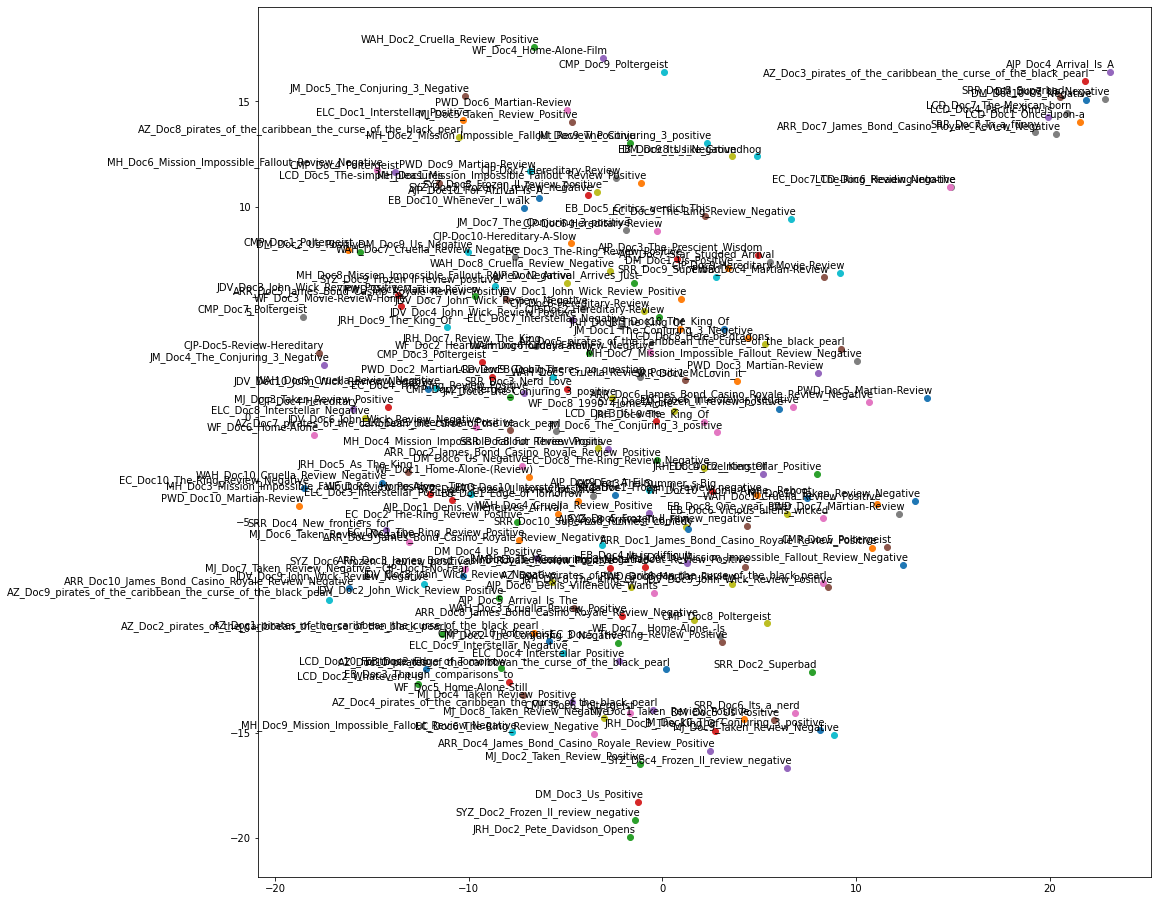

In [ ]:
#plot doc2vec via TSNE
plot_doc2vec(doc2vec_df, titles,15)

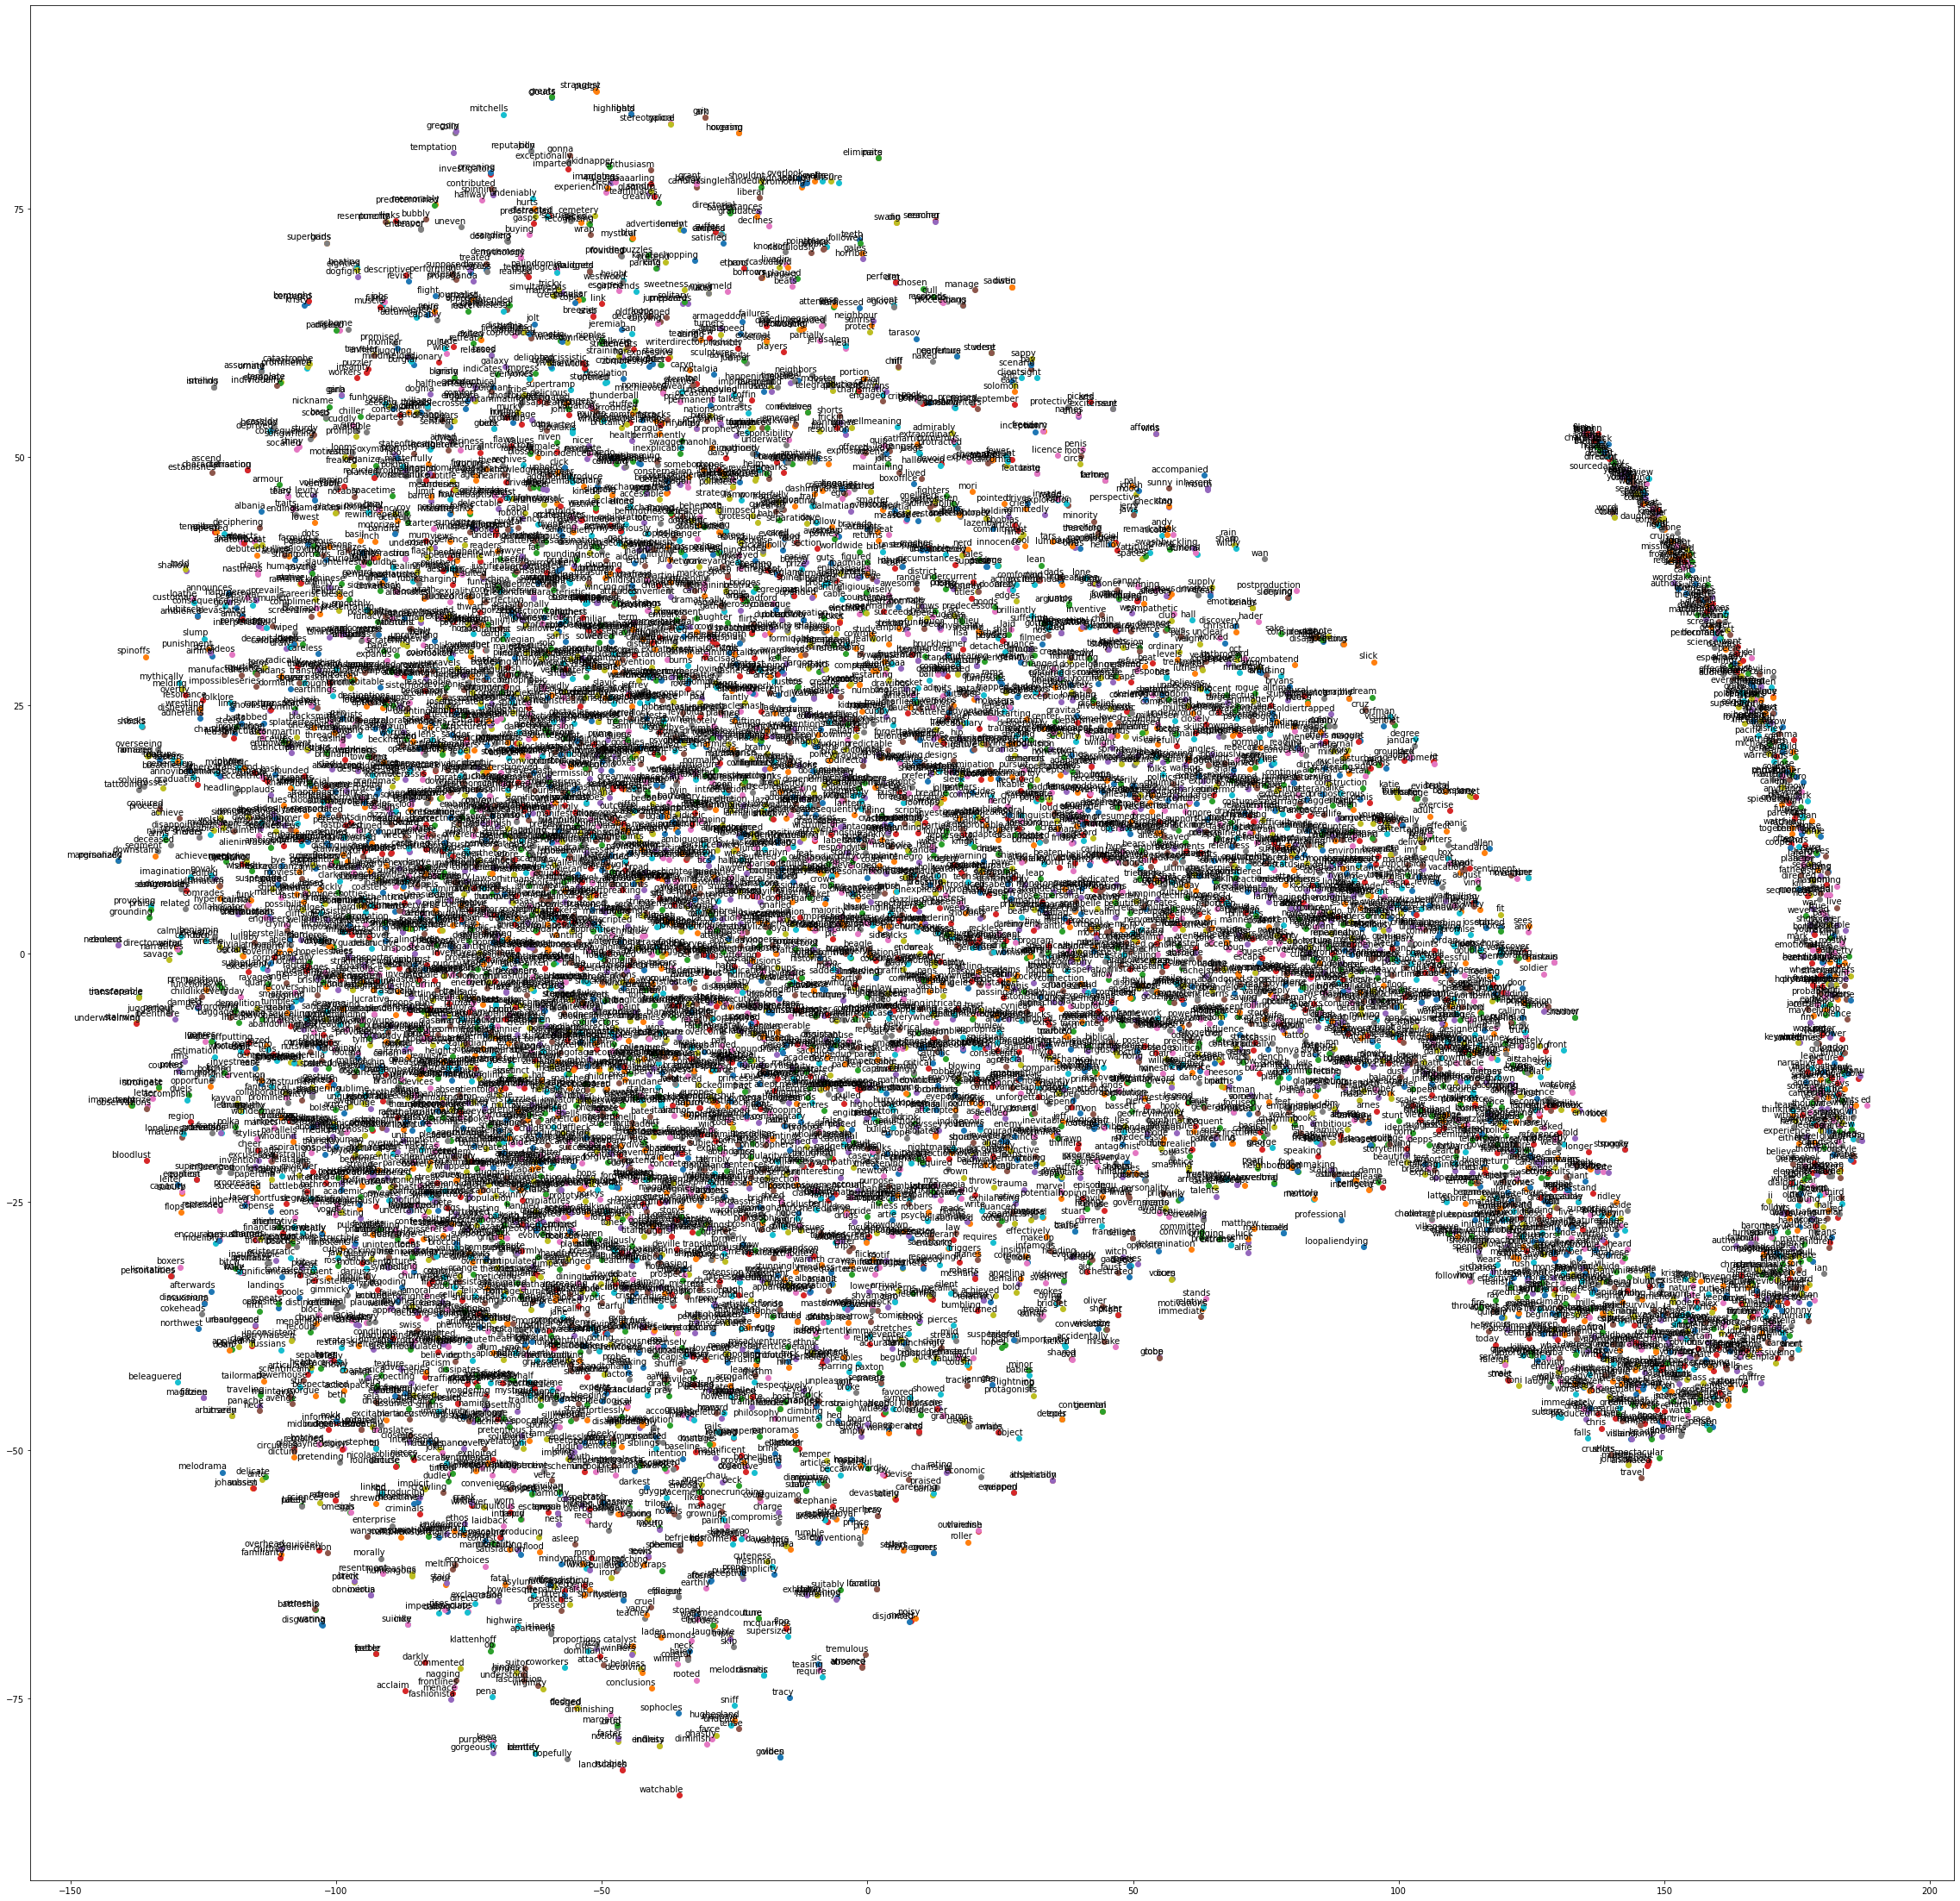

In [ ]:
#plot word2vec via TSNE
plot_word2vec(word2vec_model, labels, tokens,20)

In [ ]:
%%shell
jupyter nbconvert --to html /content/Holst_Assignment_A_1_First_Vectorized_Representation.ipynb

[NbConvertApp] Converting notebook /content/Holst_Assignment_A_1_First_Vectorized_Representation.ipynb to html
[NbConvertApp] Writing 15781704 bytes to /content/Holst_Assignment_A_1_First_Vectorized_Representation.html
